# 1. Introduction

# Libraries and Data importation

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import full dataframe
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_univariate_final_v2_light.parquet")

# 2. Data Overview

In [6]:
# Shape of the dataset (rows, columns).

In [7]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,chapter codes,chapter names,LOS_capped,group codes,group names
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001,C00-D48,tumores [neoplasias],2,C76-C80,tumores [neoplasias] malignos de sitios mal de...
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E00-E90,"enfermedades endocrinas, nutricionales y metab...",58,E10-E14,diabetes mellitus
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001,J00-J99,enfermedades del sistema respiratorio,12,J09-J18,influenza [gripe] y neumonía
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001,S00-T98,"traumatismos, envenenamientos y algunas otras ...",1,S00-S09,traumatismos de la cabeza
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001,K00-K93,enfermedades del sistema digestivo,7,K80-K87,"trastornos de la vesícula biliar, de las vías ..."


In [8]:
df.shape

(25758741, 15)

# Data dictionary / main variables (categorical, numerical).

In [10]:
# Data type customization really helped to reduce memory usage, increasing speed and capacity to create new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 15 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  category
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    category
 8   primary diagnosis name    category
 9   year                      int32   
 10  chapter codes             category
 11  chapter names             object  
 12  LOS_capped                int32   
 13  group codes               category
 14  group names               category
dtypes: category(11), int32(3), object(1)
memory usage: 885.0+ MB


# Missing values / NA treatment summary.

In [12]:
# Dataframe is cleaned from previous steps
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
chapter codes               0
chapter names               0
LOS_capped                  0
group codes                 0
group names                 0
dtype: int64

# First impressions after univariate analysis (anything noteworthy?).

# List of pairs of variables to perform bivariate analysis (CHECK CHAT GPT CONVERSATION TO HAVE MORE GUIDANCE)

# 3. Bivariate analysis (RECUERDA SIEMPRE RELACIONAR CON PREGUNTAS GUIA)

# A. Descriptive Pairs

# 1. Pair 1: [Year] × [Healthcare facility type]

# 2. Purpose / Guiding Question


# 3. Counts / Crosstab

In [20]:
# It creates a table with the count of discharges per year per healthcare facility type. Note year 2023 the data is missing, so was imputed to "Unknown"
table_pair1 = df.pivot_table(index="year", columns="healthcare facility type", aggfunc='size', fill_value=0, margins=False, dropna=True)

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\1040445215.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table_pair1 = df.pivot_table(index="year", columns="healthcare facility type", aggfunc='size', fill_value=0, margins=False, dropna=True)


In [21]:
table_pair1

healthcare facility type,Private,Public,Unknown
year,,,
2001,17386,390930,0
2002,48688,822956,0
2003,226774,858602,0
2004,109909,418070,0
2005,240245,871859,0
2006,273618,883401,0
2007,237648,896942,0
2008,246197,873035,0
2009,291199,886366,0


# 4. Proportions / Percentages

In [23]:
# Divide each row by its row sum: It gives the proportion of dishcarges per sector per year
normalized = table_pair1.div(table_pair1.sum(axis=1), axis=0)

In [24]:
normalized

healthcare facility type,Private,Public,Unknown
year,,,
2001,0.042580,0.957420,0.0
2002,0.055858,0.944142,0.0
2003,0.208936,0.791064,0.0
2004,0.208169,0.791831,0.0
2005,0.216027,0.783973,0.0
2006,0.236485,0.763515,0.0
2007,0.209457,0.790543,0.0
2008,0.219970,0.780030,0.0
2009,0.247289,0.752711,0.0


# 5. Visualization

Text(0.5, 1.0, 'Proportion of Healthcare Facility Types per Year')

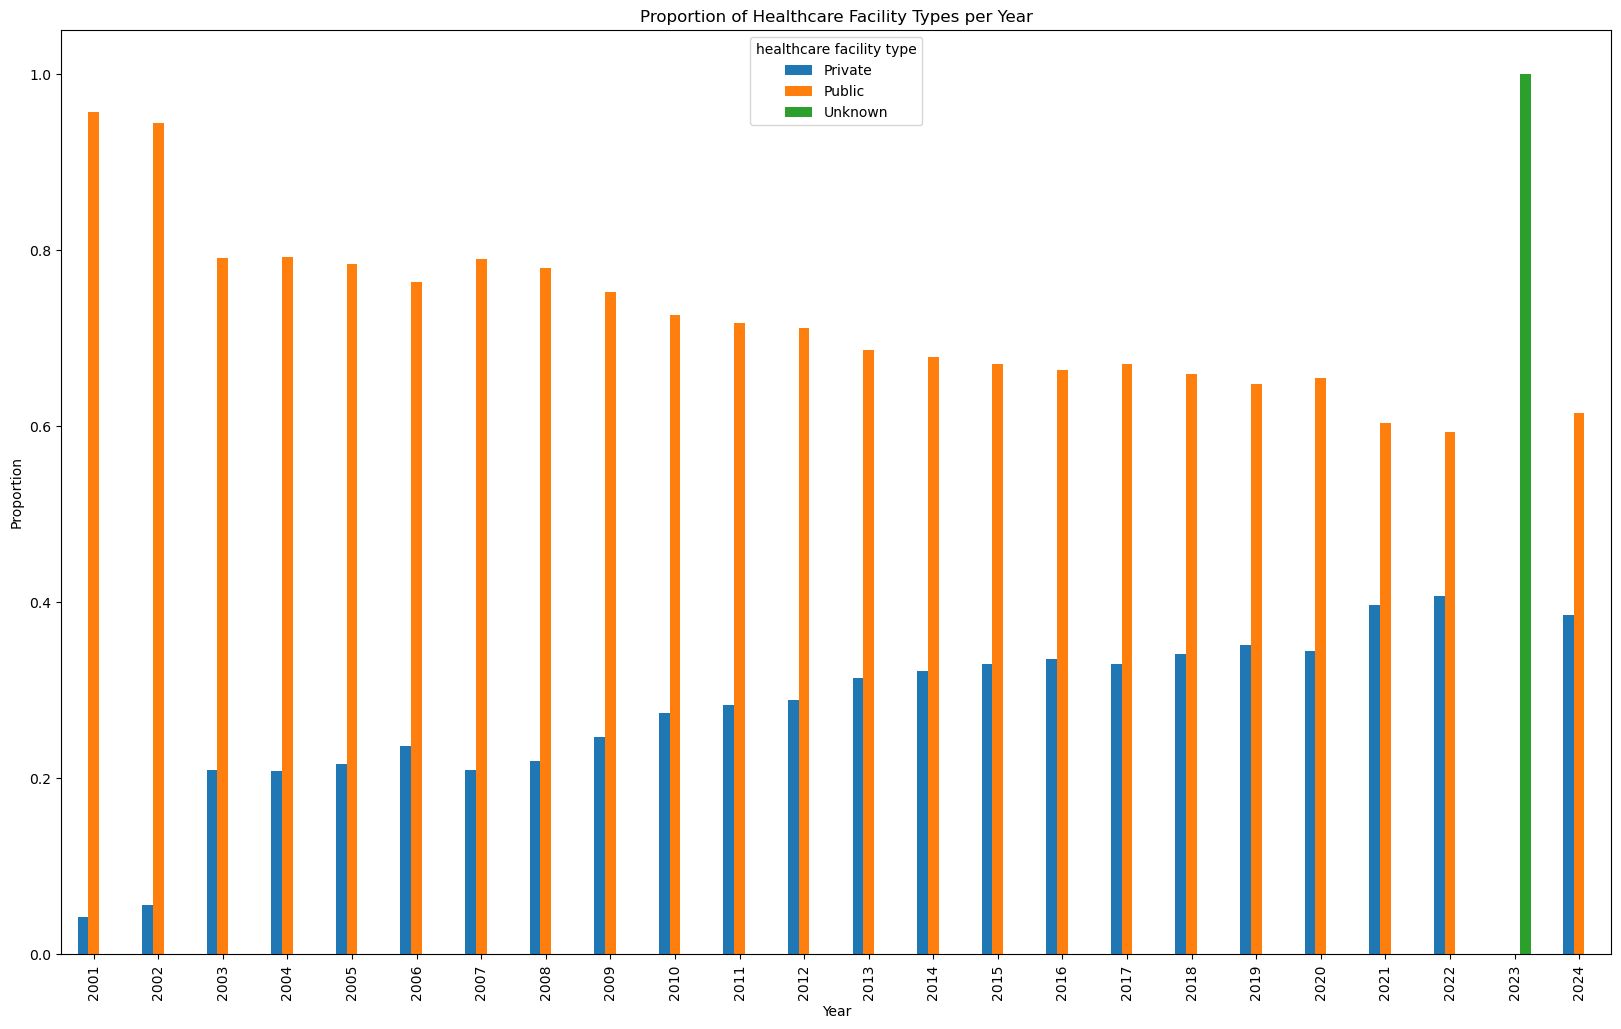

In [26]:
# Unstacked bar plot
ax = normalized.plot(kind="bar", stacked=False, figsize=(20,12))
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")
ax.set_title("Proportion of Healthcare Facility Types per Year")


# 6. Key Insights

# 7. Notes / Considerations

# 1. Pair 2: [Year] × [Insurance]

# 2. Purpose / Guiding Question:


# 3. Counts / Crosstab:



In [32]:
# Table showing count of discharges per health insurance per year
table_pair2 = df.pivot_table(index="year", columns="health insurance", aggfunc='size', fill_value=0, margins=False, dropna=True)

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\1233202223.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table_pair2 = df.pivot_table(index="year", columns="health insurance", aggfunc='size', fill_value=0, margins=False, dropna=True)


In [33]:
table_pair2

health insurance,Fonasa,Isapre
year,,
2001,406918,1398
2002,818933,52711
2003,884657,200719
2004,438507,89472
2005,923554,188550
2006,942473,214546
2007,960288,174302
2008,934346,184886
2009,957993,219572


# 4. Proportions / Percentages:



In [35]:
# Divide each row by its row sum to show proportion of discharges for both insurance per year
normalized_pair2 = table_pair2.div(table_pair2.sum(axis=1), axis=0)

In [36]:
normalized_pair2

health insurance,Fonasa,Isapre
year,,
2001,0.996576,0.003424
2002,0.939527,0.060473
2003,0.815070,0.184930
2004,0.830539,0.169461
2005,0.830457,0.169543
2006,0.814570,0.185430
2007,0.846374,0.153626
2008,0.834810,0.165190
2009,0.813537,0.186463


# 5. Visualization:



Text(0.5, 1.0, 'Proportion of Health insurance per Year')

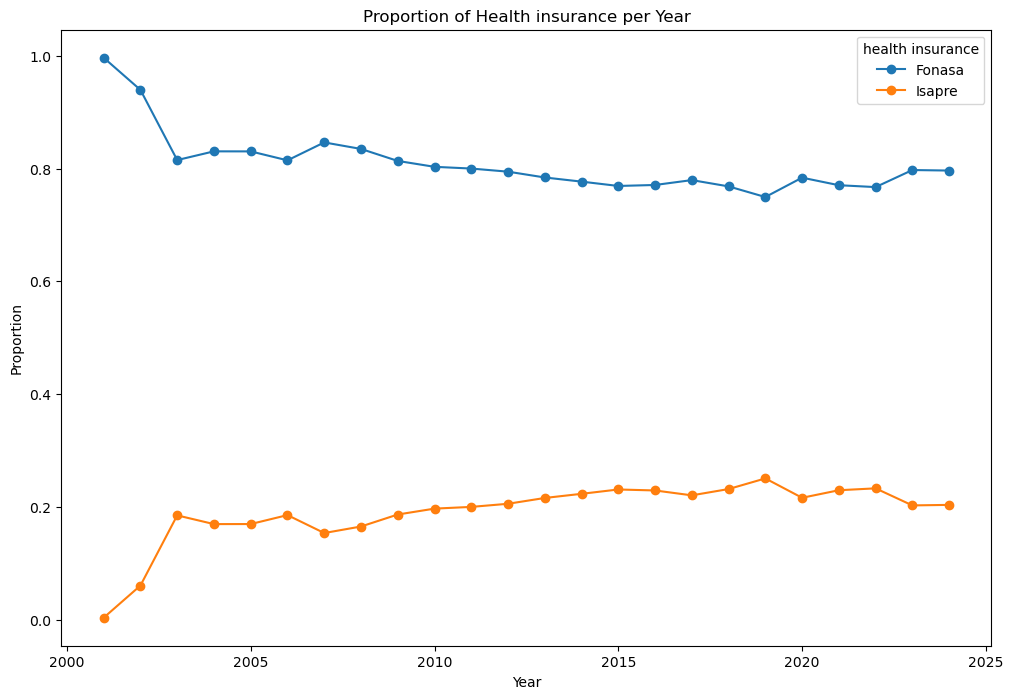

In [38]:
# line chart with proportion evolution of discharges per insurance per year
ax = normalized_pair2.plot(kind="line", marker = "o", figsize=(12,8))
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")
ax.set_title("Proportion of Health insurance per Year")

# 6. Key Insights:



# 7. Notes / Considerations:


# 1. Pair 3: [Hospital Type] × [Diagnosis]


# 2. Purpose / Guiding Question:


# 3. Counts / Crosstab:




In [44]:
# counts of discharges per facility type per diagnosis group
pd.crosstab(df['group names'], df['healthcare facility type'])

healthcare facility type,Private,Public,Unknown
group names,,,
otros efectos y los no especificados de causas externas,5928,19418,1366
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,892,8011,190
afecciones supurativas y necróticas de las vías respiratorias inferiores,1594,12849,949
algunas complicaciones precoces de traumatismos,2294,3772,410
alteraciones de la visión y ceguera,545,1134,151
...,...,...,...
tumores malignos de los órganos genitales masculinos,33050,71966,5549
tumores malignos de los órganos respiratorios e intratorácicos,23446,48353,4135
"tumores malignos del labio, de la cavidad bucal y de la faringe",5191,14024,1108


# 4. Proportions / Percentages:



In [46]:
# proportion of discharges per facility type per diagnosis group
pd.crosstab(df['group names'], df['healthcare facility type'], normalize='index')

healthcare facility type,Private,Public,Unknown
group names,,,
otros efectos y los no especificados de causas externas,0.221923,0.726939,0.051138
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.098097,0.881007,0.020895
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.103560,0.834784,0.061655
algunas complicaciones precoces de traumatismos,0.354231,0.582458,0.063311
alteraciones de la visión y ceguera,0.297814,0.619672,0.082514
...,...,...,...
tumores malignos de los órganos genitales masculinos,0.298919,0.650893,0.050188
tumores malignos de los órganos respiratorios e intratorácicos,0.308768,0.636777,0.054455
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.255425,0.690056,0.054520


In [47]:
# get top 10 most frequent groups
top10_groupnames = df["group names"].value_counts().head(10)

In [48]:
# Take the group names from series object and save them into a list
list_top10_groupnames = top10_groupnames.index.to_list()

In [49]:
list_top10_groupnames

['trastornos de la vesícula biliar, de las vías biliares y del páncreas',
 'influenza [gripe] y neumonía',
 'enfermedades del apéndice',
 'otras formas de enfermedad del corazón',
 'hernia ',
 'otras enfermedades de las vías respiratorias superiores',
 'enfermedades cerebrovasculares',
 'trastornos no inflamatorios de los órganos genitales femeninos',
 'enfermedades de los órganos genitales masculinos',
 'enfermedades isquémicas del corazón']

In [50]:
# Filter dataframe considering just discharges with one of the top 10 group names
top10_df_groupnames = df[df["group names"].isin(list_top10_groupnames)]

In [51]:
# proportion of discharges by facility type per top 10 group names
normalized_pair3 = pd.crosstab(top10_df_groupnames['group names'], top10_df_groupnames['healthcare facility type'], normalize='index')

In [52]:
normalized_pair3

healthcare facility type,Private,Public,Unknown
group names,,,
enfermedades cerebrovasculares,0.136878,0.807222,0.055900
enfermedades de los órganos genitales masculinos,0.435386,0.517989,0.046625
enfermedades del apéndice,0.210710,0.754039,0.035251
enfermedades isquémicas del corazón,0.192401,0.747222,0.060376
hernia,0.386367,0.569286,0.044348
influenza [gripe] y neumonía,0.121319,0.839694,0.038987
otras enfermedades de las vías respiratorias superiores,0.550549,0.411332,0.038120
otras formas de enfermedad del corazón,0.161961,0.785154,0.052884
"trastornos de la vesícula biliar, de las vías biliares y del páncreas",0.324119,0.622818,0.053063


# 5. Visualization:

Text(0.5, 1.0, 'Proportion of Healthcare Facility Types by top 10 most frequent diagnosis groups')

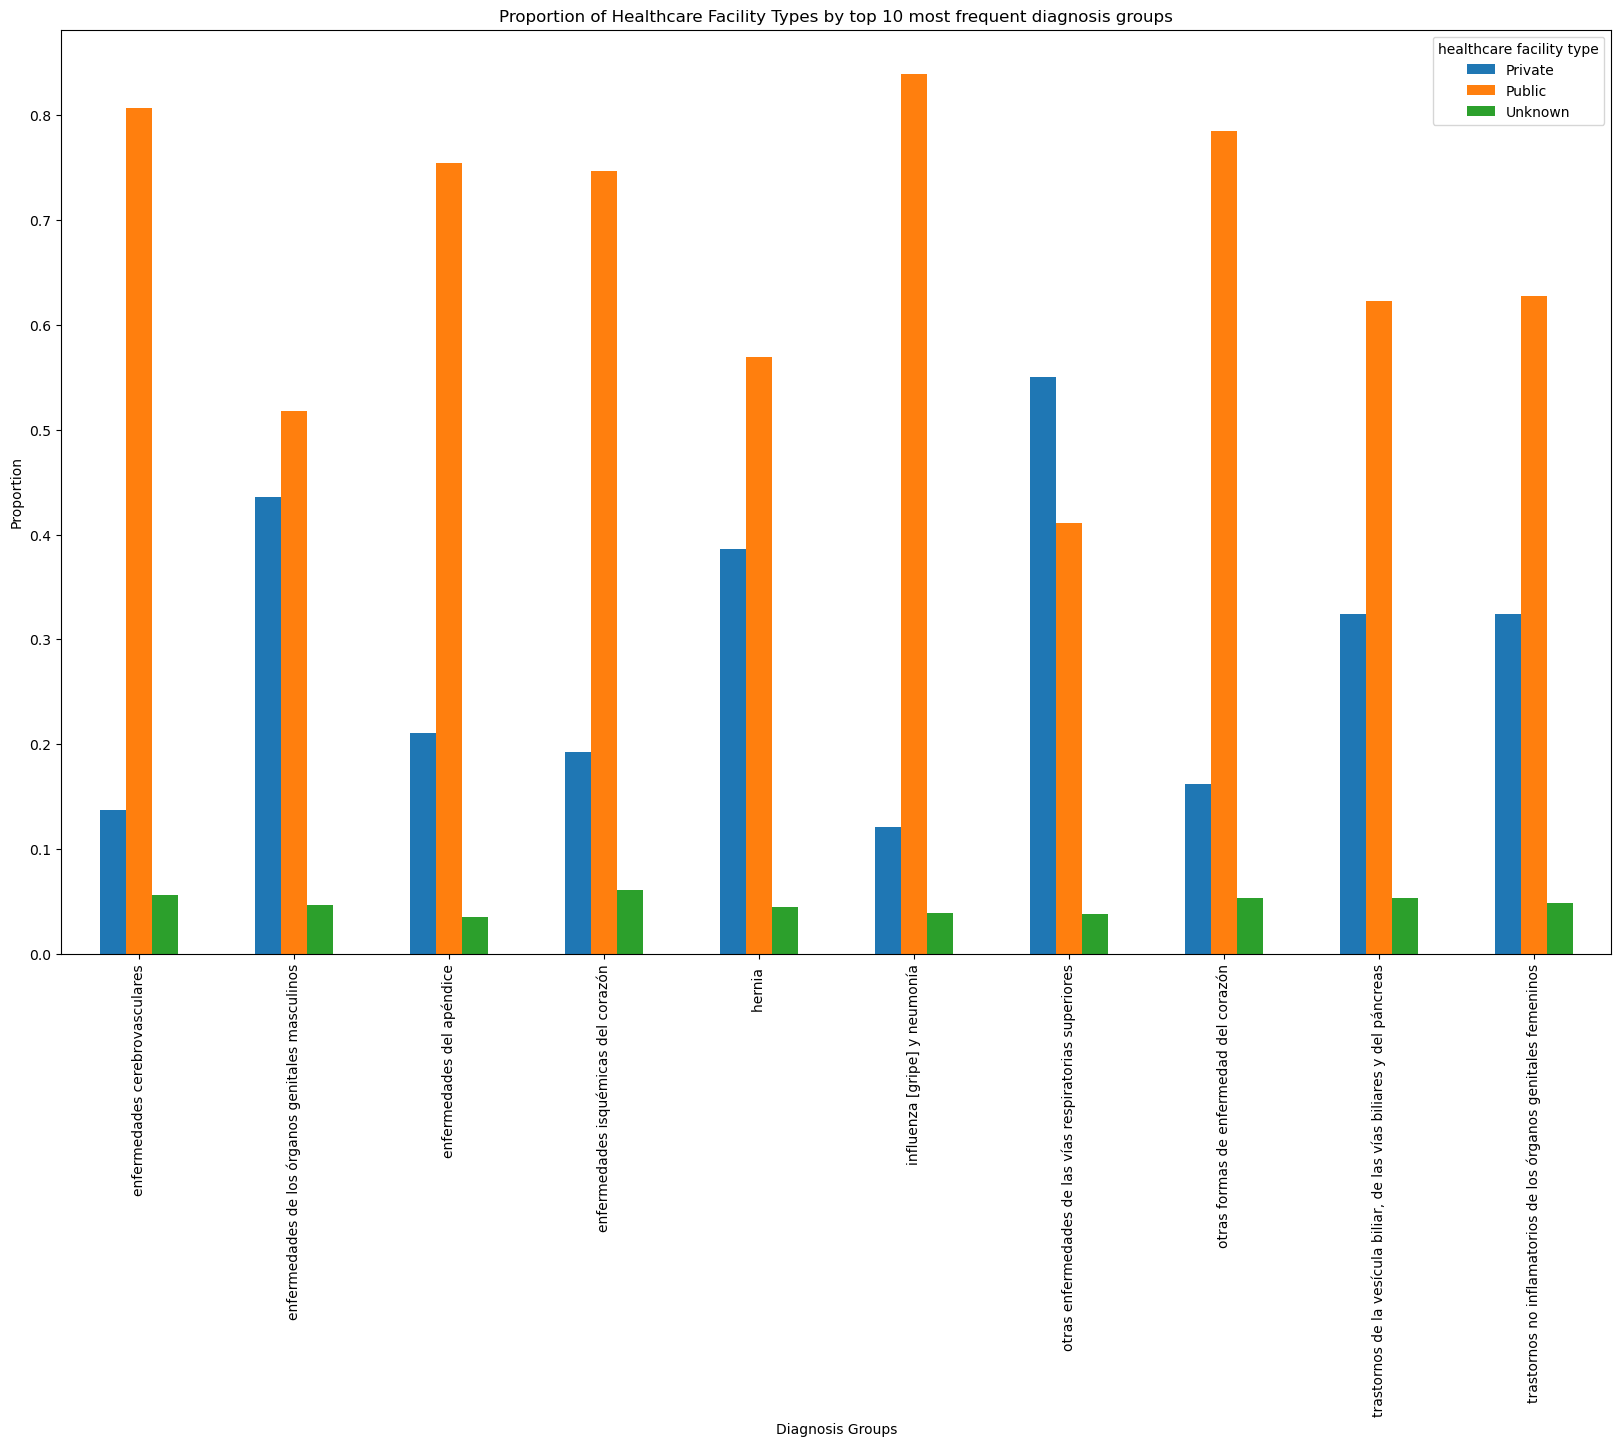

In [54]:
# Bar chart with proportions per facility type per diagnosis group
ax = normalized_pair3.plot(kind="bar", stacked=False, figsize=(20,12))
ax.set_ylabel("Proportion")
ax.set_xlabel("Diagnosis Groups")
ax.set_title("Proportion of Healthcare Facility Types by top 10 most frequent diagnosis groups")

# 6. Key Insights:





# 7. Notes / Considerations:


# 1. Pair 4: [Hospital Type] × [Sex/Age/Insurance]

# 2. Purpose / Guiding Question:


# 3. Counts / Crosstab:

In [60]:
# Counts of discharges by sex per facility type
pd.crosstab(df['sex'], df['healthcare facility type'])


healthcare facility type,Private,Public,Unknown
sex,,,
Male,3635851,9058293,596416
Female,3414749,8431062,622370


In [61]:
# Counts of discharges by age range per facility type
pd.crosstab(df['age'], df['healthcare facility type'])


healthcare facility type,Private,Public,Unknown
age,,,
0-1,343584,1766913,48506
1-9,550316,1488188,88666
10-19,461271,1396089,76045
20-29,740838,1254969,90151
30-39,1052485,1472110,134036
40-49,1105759,1881124,147099
50-59,1033921,2104722,165871
60-69,857952,2345978,196070
70-79,560913,2214722,162492


In [62]:
# Counts of discahrges by insurance per facility type
pd.crosstab(df['health insurance'], df['healthcare facility type'])


healthcare facility type,Private,Public,Unknown
health insurance,,,
Fonasa,2523882,17192412,971849
Isapre,4526718,296943,246937


# 4. Proportions / Percentages:

In [64]:
# Proportion of discahrges by sex per facility type
normalized_sex = pd.crosstab(df['sex'], df['healthcare facility type'], normalize='columns')

In [65]:
normalized_sex

healthcare facility type,Private,Public,Unknown
sex,,,
Male,0.51568,0.517932,0.489353
Female,0.48432,0.482068,0.510647


In [66]:
# Proportion of discharges by age per facility type
normalized_age = pd.crosstab(df['age'], df['healthcare facility type'], normalize='columns')

In [67]:
normalized_age

healthcare facility type,Private,Public,Unknown
age,,,
0-1,0.048731,0.101028,0.039799
1-9,0.078052,0.085091,0.072749
10-19,0.065423,0.079825,0.062394
20-29,0.105074,0.071756,0.073968
30-39,0.149276,0.084172,0.109975
40-49,0.156832,0.107558,0.120693
50-59,0.146643,0.120343,0.136095
60-69,0.121685,0.134137,0.160873
70-79,0.079555,0.126633,0.133323


In [68]:
# Proportion of discharges by insurance per facility type
normalized_insurance = pd.crosstab(df['health insurance'], df['healthcare facility type'], normalize='columns')

In [69]:
normalized_insurance

healthcare facility type,Private,Public,Unknown
health insurance,,,
Fonasa,0.357967,0.983022,0.797391
Isapre,0.642033,0.016978,0.202609


# 5. Visualization:



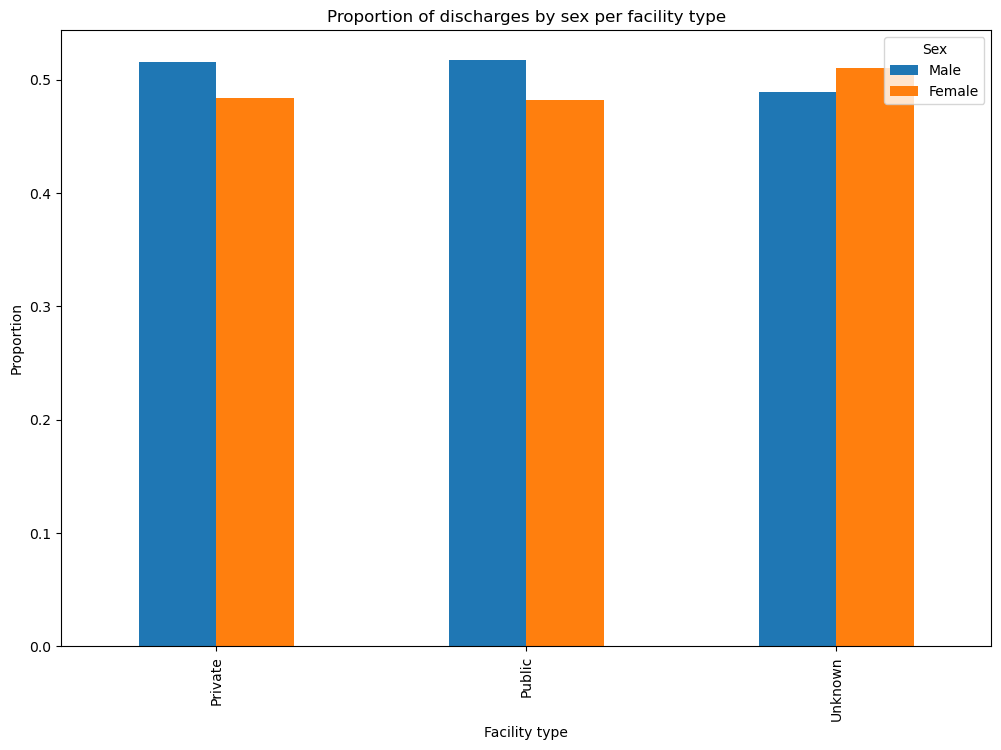

In [71]:
ax = normalized_sex.T.plot(kind="bar", stacked=False, figsize=(12,8))
ax.set_ylabel("Proportion")
ax.set_xlabel("Facility type")
plt.legend(title="Sex")
ax.set_title("Proportion of discharges by sex per facility type")
plt.show()

Text(0.5, 1.0, 'Age Distribution by Facility Type (Normalized)')

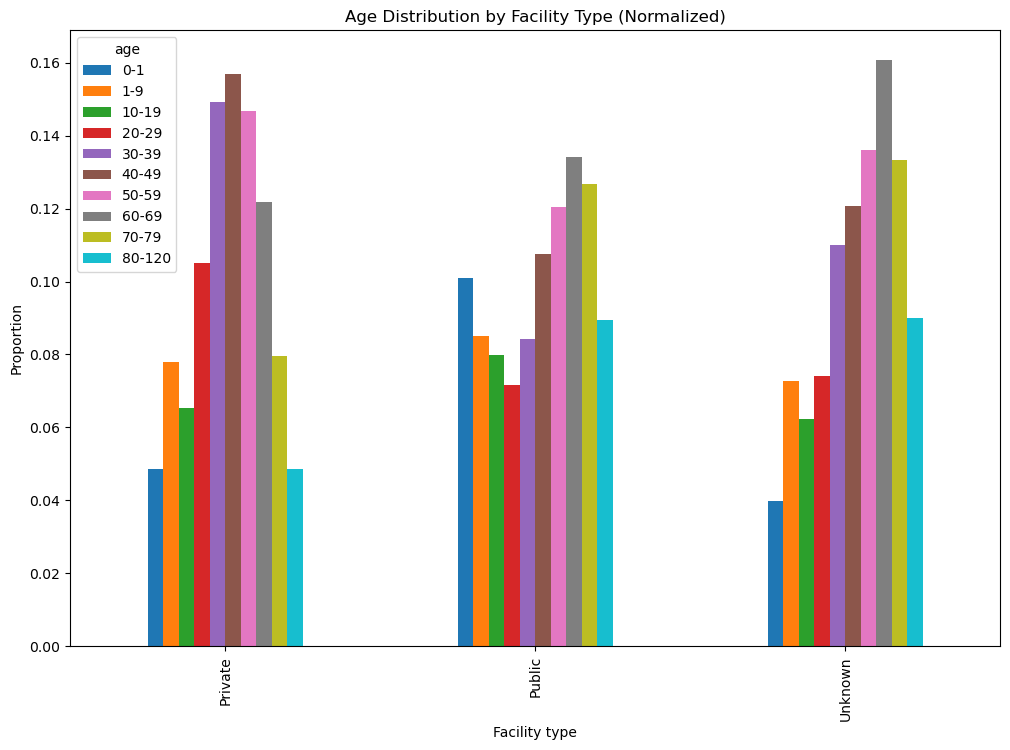

In [72]:
ax = normalized_age.T.plot(kind="bar", stacked=False,figsize=(12,8))
ax.set_ylabel("Proportion")
ax.set_xlabel("Facility type")
ax.set_title("Age Distribution by Facility Type (Normalized)")


Text(0.5, 1.0, 'Proportion of discharges by insurance per facility type')

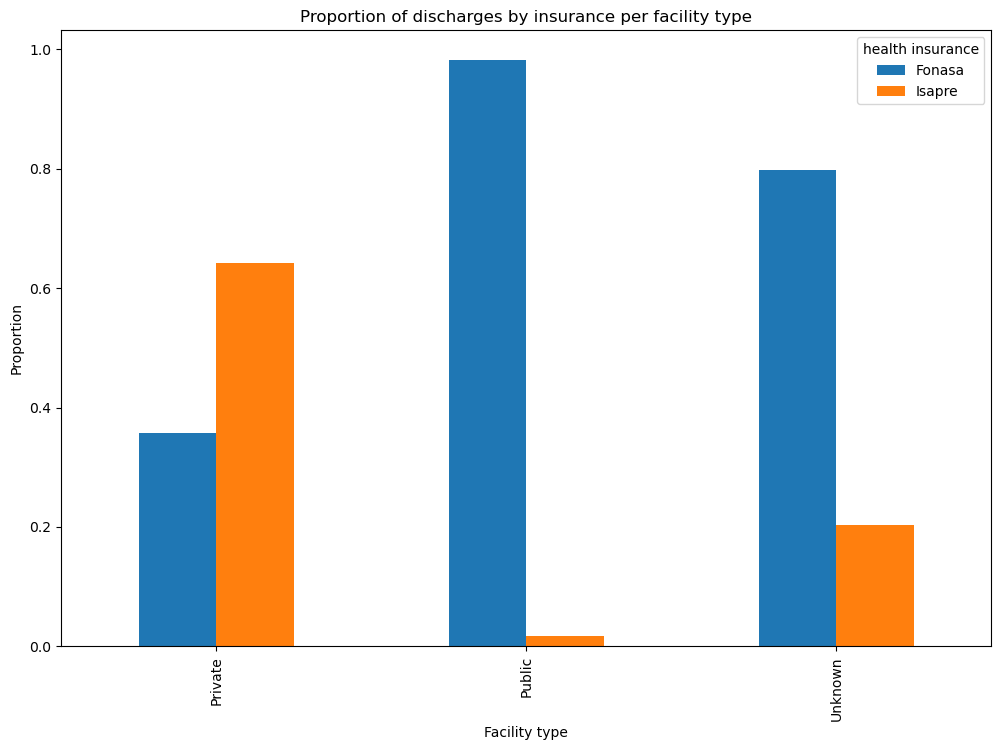

In [73]:
ax = normalized_insurance.T.plot(kind="bar", stacked=False, figsize=(12,8))
ax.set_ylabel("Proportion")
ax.set_xlabel("Facility type")
ax.set_title("Proportion of discharges by insurance per facility type")

# 6. Key Insights:



# 7. Notes / Considerations:



# 1. Pair 5: [Insurance] × [Age/Sex/Diangosis]

# 2. Purpose / Guiding Question:

# 3. Counts / Crosstab:

In [79]:
# Counts of discharges by insurance per age
pd.crosstab(df['health insurance'], df['age'])

age,0-1,1-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-120
health insurance,,,,,,,,,,
Fonasa,1885029,1698478,1542222,1537374,1829040,2281194,2569103,2854578,2633760,1857365
Isapre,273974,428692,391183,548584,829591,852788,735411,545422,304367,160586


In [80]:
# Counts of discharges by insurance per sex
pd.crosstab(df['health insurance'], df['sex'])

sex,Male,Female
health insurance,,
Fonasa,10596624,10091519
Isapre,2693936,2376662


In [81]:
# Counts of discharges by insurance per diangosis
pd.crosstab(df['health insurance'], df['group names'])

group names,otros efectos y los no especificados de causas externas,afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,afecciones supurativas y necróticas de las vías respiratorias inferiores,algunas complicaciones precoces de traumatismos,alteraciones de la visión y ceguera,anemias aplásticas y otras anemias,anemias hemolíticas,anemias nutricionales,"anomalías cromosómicas, no clasificadas en otra parte",artropatías infecciosas,...,tumores malignos de las vías urinarias,tumores malignos de los huesos y de los cartílagos articulares de los miembros,tumores malignos de los tejidos mesoteliales y de los tejidos blandos,tumores malignos de los órganos digestivos,tumores malignos de los órganos genitales femeninos,tumores malignos de los órganos genitales masculinos,tumores malignos de los órganos respiratorios e intratorácicos,"tumores malignos del labio, de la cavidad bucal y de la faringe","tumores malignos del ojo, del encéfalo y de otras partes del sistema nervioso central",urticaria y eritema
health insurance,,,,,,,,,,,,,,,,,,,,,
Fonasa,21464,8282,14235,5055,1398,60700,10239,18711,7102,14485,...,56645,15601,16927,297352,104078,86410,57912,16868,24325,12193
Isapre,5248,811,1157,1421,432,9076,2105,7196,928,2155,...,17393,3624,4998,55257,14443,24155,18022,3455,5769,4560


# 4. Proportions / Percentages:

In [83]:
# Proportion of discharges by insurance per age
normalized_insage = pd.crosstab(df['health insurance'], df['age'], normalize='index')

In [213]:
normalized_insage

age,0-1,1-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-120
health insurance,,,,,,,,,,
Fonasa,0.09112,0.08210,0.07455,0.07431,0.08841,0.11027,0.12418,0.13798,0.12731,0.08978
Isapre,0.05403,0.08454,0.07715,0.10819,0.16361,0.16818,0.14503,0.10757,0.06003,0.03167


In [84]:
# Proportion of discharges by sex per facility type
normalized_insex = pd.crosstab(df['health insurance'], df['sex'], normalize='index')

In [215]:
normalized_insex

sex,Male,Female
health insurance,,
Fonasa,0.51221,0.48779
Isapre,0.53129,0.46871


In [85]:
# Proportion of discharges by sex per facility type
normalized_insdiag = pd.crosstab(df['health insurance'], df['group names'], normalize='index')

In [217]:
normalized_insdiag

group names,otros efectos y los no especificados de causas externas,afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,afecciones supurativas y necróticas de las vías respiratorias inferiores,algunas complicaciones precoces de traumatismos,alteraciones de la visión y ceguera,anemias aplásticas y otras anemias,anemias hemolíticas,anemias nutricionales,"anomalías cromosómicas, no clasificadas en otra parte",artropatías infecciosas,...,tumores malignos de las vías urinarias,tumores malignos de los huesos y de los cartílagos articulares de los miembros,tumores malignos de los tejidos mesoteliales y de los tejidos blandos,tumores malignos de los órganos digestivos,tumores malignos de los órganos genitales femeninos,tumores malignos de los órganos genitales masculinos,tumores malignos de los órganos respiratorios e intratorácicos,"tumores malignos del labio, de la cavidad bucal y de la faringe","tumores malignos del ojo, del encéfalo y de otras partes del sistema nervioso central",urticaria y eritema
health insurance,,,,,,,,,,,,,,,,,,,,,
Fonasa,0.00104,0.00040,0.00069,0.00024,0.00007,0.00293,0.00049,0.00090,0.00034,0.00070,...,0.00274,0.00075,0.00082,0.01437,0.00503,0.00418,0.00280,0.00082,0.00118,0.00059
Isapre,0.00103,0.00016,0.00023,0.00028,0.00009,0.00179,0.00042,0.00142,0.00018,0.00042,...,0.00343,0.00071,0.00099,0.01090,0.00285,0.00476,0.00355,0.00068,0.00114,0.00090


# 5. Visualizations

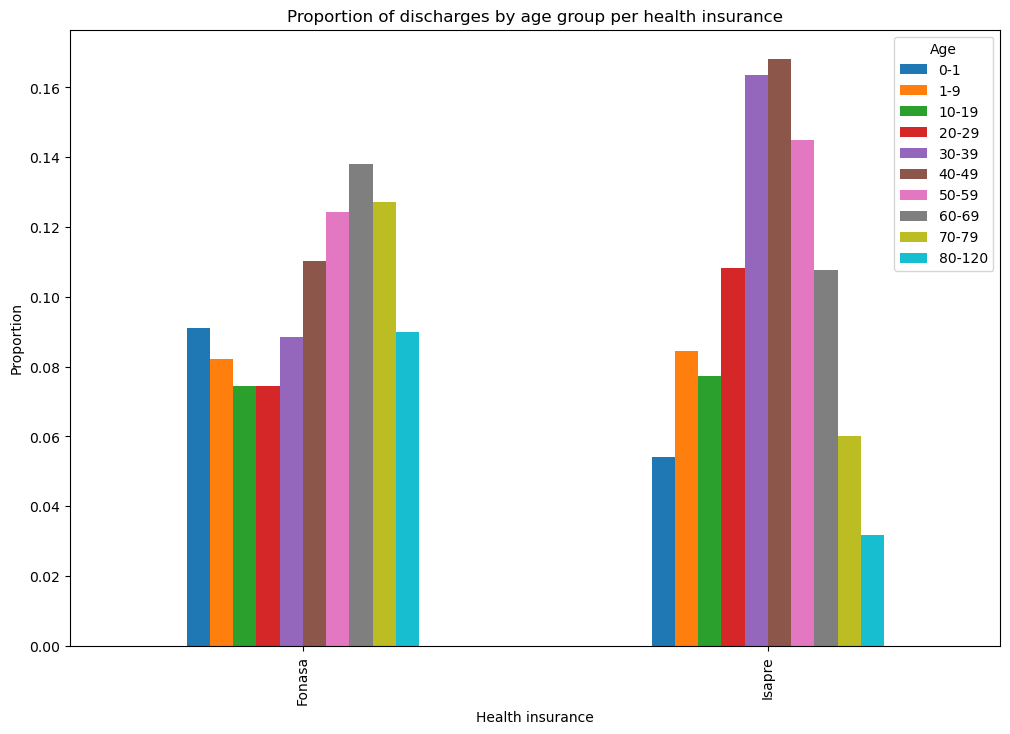

In [211]:
ax = normalized_insage.plot(kind="bar", stacked=False, figsize=(12,8))
ax.set_ylabel("Proportion")
ax.set_xlabel("Health insurance")
plt.legend(title="Age")
ax.set_title("Proportion of discharges by age group per health insurance")
plt.show()

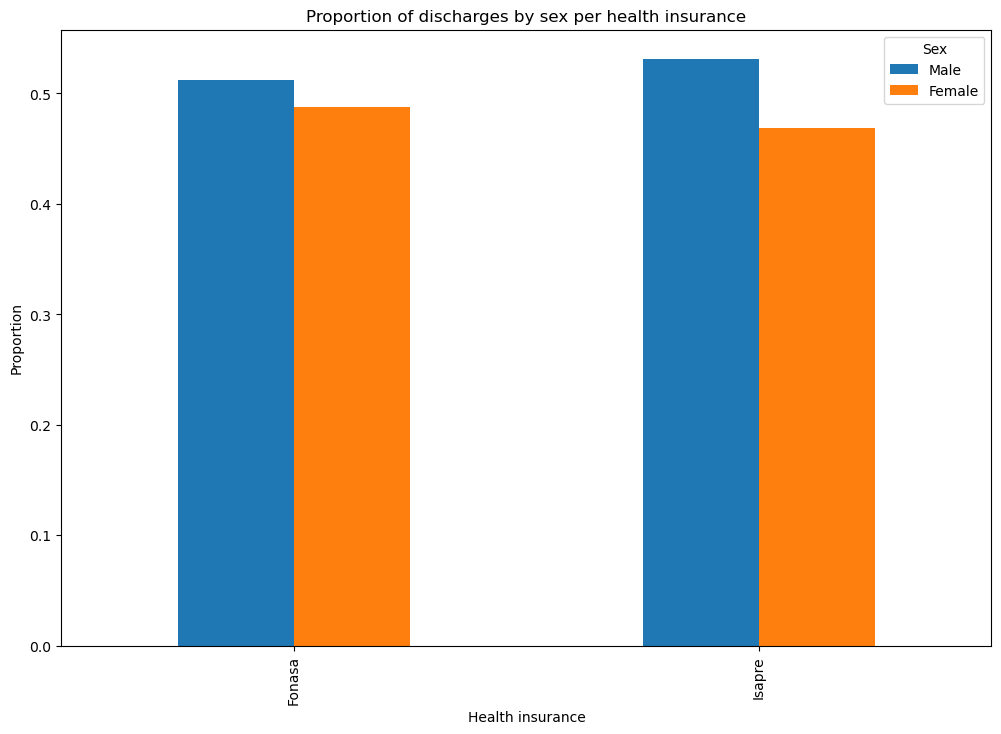

In [89]:
ax = normalized_insex.plot(kind="bar", stacked=False, figsize=(12,8))
ax.set_ylabel("Proportion")
ax.set_xlabel("Health insurance")
plt.legend(title="Sex")
ax.set_title("Proportion of discharges by sex per health insurance")
plt.show()

# VER SI ES MEJOR HACER EL GRAFICO AL REVES

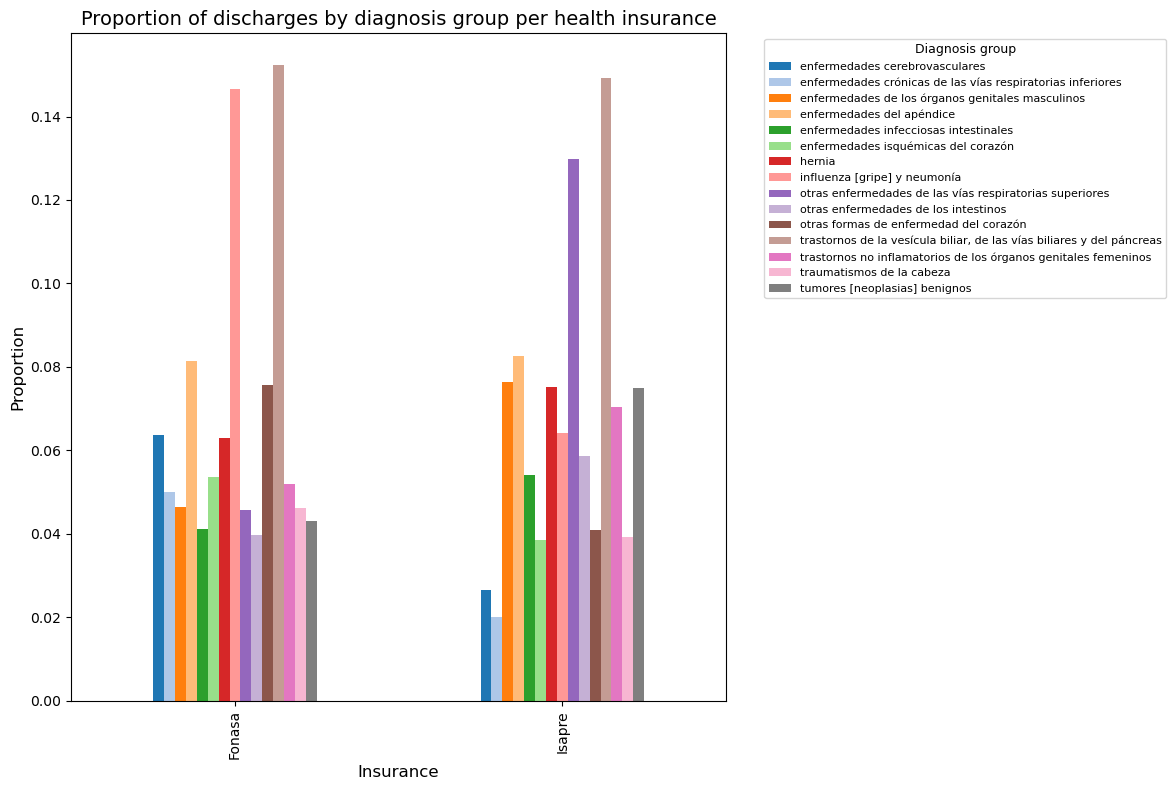

In [229]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get top 15 groups
top15_groupdiag_list = df['group names'].value_counts().head(15).index
top15_groupdiag = df[df['group names'].isin(top15_groupdiag_list)].copy()

# Crosstab (normalized per insurance)
table = pd.crosstab(
    top15_groupdiag['health insurance'],
    top15_groupdiag['group names'],
    normalize='index'
)

# Generate 15 distinct colors
colors = sns.color_palette("tab20", n_colors=15)  # or "husl", "Set3", "hsv"

# Plot
ax = table.plot(kind='bar', stacked=False, figsize=(12, 8), color=colors)

# Labels and title
ax.set_ylabel("Proportion", fontsize=12)
ax.set_xlabel("Insurance", fontsize=12)
ax.set_title("Proportion of discharges by diagnosis group per health insurance", fontsize=14)

# Legend formatting
plt.legend(title="Diagnosis group", fontsize=8, title_fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 6. Key insights

# 7. Notes / Considerations:

# B. Deep Dive Pairs

# 1. Pair 1: [Diagnosis] × [Year]

# 1.a Counts / Crosstab / Summary Table

In [97]:
# Counts of "d" diangosis groups in "y" year
group_counts = df.groupby(['group names', "year"]).size().unstack(level=1).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\1800090866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby(['group names', "year"]).size().unstack(level=1).reset_index()


In [98]:
group_counts

year,group names,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,otros efectos y los no especificados de causa...,568,1012,1242,735,1199,1314,1134,1139,1162,...,1131,1098,1095,1222,722,1057,1092,1240,1366,1479
1,afecciones asociadas con la regulación tegumen...,305,426,470,234,396,413,487,526,606,...,376,347,377,344,237,324,207,281,190,235
2,afecciones supurativas y necróticas de las vía...,456,598,644,457,634,608,631,577,590,...,640,626,734,690,495,544,620,779,949,1095
3,algunas complicaciones precoces de traumatismos,95,166,155,115,213,188,202,291,267,...,304,315,301,351,258,312,361,367,410,496
4,alteraciones de la visión y ceguera,12,33,53,15,61,48,67,62,70,...,108,100,107,105,46,71,99,112,151,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,tumores malignos de los órganos genitales masc...,2976,3379,4858,5282,4932,4883,4095,4028,4338,...,4528,4600,4872,4909,5071,3845,4596,5225,5549,6050
213,tumores malignos de los órganos respiratorios ...,1283,2060,3232,2163,3353,3197,3102,2976,3237,...,3478,3715,3514,3749,2097,2981,3236,3675,4135,4306
214,"tumores malignos del labio, de la cavidad buca...",379,562,680,491,666,703,691,801,811,...,959,904,997,1059,584,867,1078,1233,1108,1392
215,"tumores malignos del ojo, del encéfalo y de ot...",449,764,1030,669,1065,1043,1066,1090,1220,...,1449,1354,1448,1571,814,1504,1648,1590,1611,1722


# 1.b Proportions (prevalence)

In [100]:
# Prevalence measure: counts of "d" diangosis groups in "y" year divided by total amount of discharges "y" year
prevalence = group_counts.set_index('group names').div(group_counts.drop('group names', axis=1).sum(axis=0), axis=1)

In [101]:
prevalence

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
group names,,,,,,,,,,,,,,,,,,,,,
otros efectos y los no especificados de causas externas,0.001391,0.001161,0.001144,0.001392,0.001078,0.001136,0.000999,0.001018,0.000987,0.001035,...,0.000954,0.000937,0.000924,0.000996,0.001202,0.001075,0.000946,0.001006,0.001121,0.001084
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.000747,0.000489,0.000433,0.000443,0.000356,0.000357,0.000429,0.000470,0.000515,0.000574,...,0.000317,0.000296,0.000318,0.000280,0.000395,0.000329,0.000179,0.000228,0.000156,0.000172
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.001117,0.000686,0.000593,0.000866,0.000570,0.000525,0.000556,0.000516,0.000501,0.000590,...,0.000540,0.000534,0.000620,0.000562,0.000824,0.000553,0.000537,0.000632,0.000779,0.000802
algunas complicaciones precoces de traumatismos,0.000233,0.000190,0.000143,0.000218,0.000192,0.000162,0.000178,0.000260,0.000227,0.000249,...,0.000256,0.000269,0.000254,0.000286,0.000430,0.000317,0.000313,0.000298,0.000336,0.000363
alteraciones de la visión y ceguera,0.000029,0.000038,0.000049,0.000028,0.000055,0.000041,0.000059,0.000055,0.000059,0.000054,...,0.000091,0.000085,0.000090,0.000086,0.000077,0.000072,0.000086,0.000091,0.000124,0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tumores malignos de los órganos genitales masculinos,0.007288,0.003877,0.004476,0.010004,0.004435,0.004220,0.003609,0.003599,0.003684,0.003814,...,0.003818,0.003923,0.004113,0.004001,0.008444,0.003909,0.003983,0.004240,0.004553,0.004433
tumores malignos de los órganos respiratorios e intratorácicos,0.003142,0.002363,0.002978,0.004097,0.003015,0.002763,0.002734,0.002659,0.002749,0.002840,...,0.002932,0.003169,0.002967,0.003056,0.003492,0.003031,0.002804,0.002982,0.003393,0.003155
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.000928,0.000645,0.000627,0.000930,0.000599,0.000608,0.000609,0.000716,0.000689,0.000658,...,0.000809,0.000771,0.000842,0.000863,0.000972,0.000881,0.000934,0.001001,0.000909,0.001020


In [102]:
# Prevalence expressed as percentage
prev_percent = prevalence.loc[:, prevalence.columns != 'group names'] * 100

In [103]:
# Create a row with totals, to check every year sum 100%
prev_percent.loc["Total"] = prev_percent.sum()

In [104]:
# set number of decimals to 5
pd.options.display.float_format = "{:.5f}".format

In [105]:
# prev_percent = prev_percent.round(2)

In [106]:
prev_percent

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
group names,,,,,,,,,,,,,,,,,,,,,
otros efectos y los no especificados de causas externas,0.13911,0.11610,0.11443,0.13921,0.10781,0.11357,0.09995,0.10177,0.09868,0.10350,...,0.09536,0.09365,0.09245,0.09960,0.12022,0.10746,0.09463,0.10062,0.11208,0.10836
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.07470,0.04887,0.04330,0.04432,0.03561,0.03570,0.04292,0.04700,0.05146,0.05736,...,0.03170,0.02960,0.03183,0.02804,0.03946,0.03294,0.01794,0.02280,0.01559,0.01722
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.11168,0.06861,0.05933,0.08656,0.05701,0.05255,0.05561,0.05155,0.05010,0.05904,...,0.05396,0.05339,0.06197,0.05624,0.08242,0.05531,0.05373,0.06321,0.07786,0.08023
algunas complicaciones precoces de traumatismos,0.02327,0.01904,0.01428,0.02178,0.01915,0.01625,0.01780,0.02600,0.02267,0.02493,...,0.02563,0.02687,0.02541,0.02861,0.04296,0.03172,0.03128,0.02978,0.03364,0.03634
alteraciones de la visión y ceguera,0.00294,0.00379,0.00488,0.00284,0.00549,0.00415,0.00591,0.00554,0.00594,0.00539,...,0.00911,0.00853,0.00903,0.00856,0.00766,0.00722,0.00858,0.00909,0.01239,0.01099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tumores malignos de los órganos respiratorios e intratorácicos,0.31422,0.23634,0.29778,0.40968,0.30150,0.27631,0.27340,0.26590,0.27489,0.28399,...,0.29324,0.31686,0.29667,0.30556,0.34916,0.30307,0.28043,0.29820,0.33927,0.31548
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.09282,0.06448,0.06265,0.09300,0.05989,0.06076,0.06090,0.07157,0.06887,0.06585,...,0.08086,0.07711,0.08417,0.08631,0.09724,0.08815,0.09342,0.10005,0.09091,0.10199
"tumores malignos del ojo, del encéfalo y de otras partes del sistema nervioso central",0.10996,0.08765,0.09490,0.12671,0.09576,0.09015,0.09395,0.09739,0.10360,0.11270,...,0.12217,0.11549,0.12225,0.12804,0.13554,0.15291,0.14282,0.12902,0.13218,0.12616


# 1.c Outlier / Distribution Analysis (if numerical)


# 1.d Central Tendency & Spread

In [109]:
# Create a copy for safety and compute mean for each diangosis group
prevalence = prevalence.copy()
prevalence["mean"] = prevalence.mean(axis=1)

In [110]:
# get the mean of the group means and other central and dispersion measures
prevalence["mean"].describe()

count   217.00000
mean      0.00461
std       0.00752
min       0.00000
25%       0.00056
50%       0.00160
75%       0.00565
max       0.05636
Name: mean, dtype: float64

In [111]:
# Filter groups by setting a minimum threshold where the diangosis group mean ahs to be higher than percentile 10 of the distribution
# Then create columns with Std and CV for each diagnosis group
threshold = prevalence["mean"].quantile(0.10)
prevalence_filtered = prevalence[prevalence["mean"] >= threshold].copy()
prevalence_filtered["std"] = prevalence_filtered.select_dtypes(include='number').drop(columns=["mean"]).std(axis=1)
prevalence_filtered["CV"] = prevalence_filtered["std"] / prevalence_filtered["mean"]

In [112]:
prevalence_filtered

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2018,2019,2020,2021,2022,2023,2024,mean,std,CV
group names,,,,,,,,,,,,,,,,,,,,,
otros efectos y los no especificados de causas externas,0.00139,0.00116,0.00114,0.00139,0.00108,0.00114,0.00100,0.00102,0.00099,0.00104,...,0.00100,0.00120,0.00107,0.00095,0.00101,0.00112,0.00108,0.00106,0.00013,0.12486
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.00075,0.00049,0.00043,0.00044,0.00036,0.00036,0.00043,0.00047,0.00051,0.00057,...,0.00028,0.00039,0.00033,0.00018,0.00023,0.00016,0.00017,0.00037,0.00014,0.36765
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.00112,0.00069,0.00059,0.00087,0.00057,0.00053,0.00056,0.00052,0.00050,0.00059,...,0.00056,0.00082,0.00055,0.00054,0.00063,0.00078,0.00080,0.00062,0.00015,0.24730
algunas complicaciones precoces de traumatismos,0.00023,0.00019,0.00014,0.00022,0.00019,0.00016,0.00018,0.00026,0.00023,0.00025,...,0.00029,0.00043,0.00032,0.00031,0.00030,0.00034,0.00036,0.00025,0.00007,0.26723
anemias aplásticas y otras anemias,0.00191,0.00241,0.00216,0.00212,0.00238,0.00244,0.00244,0.00258,0.00263,0.00261,...,0.00303,0.00261,0.00336,0.00306,0.00290,0.00274,0.00279,0.00267,0.00034,0.12762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tumores malignos de los órganos genitales masculinos,0.00729,0.00388,0.00448,0.01000,0.00443,0.00422,0.00361,0.00360,0.00368,0.00381,...,0.00400,0.00844,0.00391,0.00398,0.00424,0.00455,0.00443,0.00458,0.00162,0.35332
tumores malignos de los órganos respiratorios e intratorácicos,0.00314,0.00236,0.00298,0.00410,0.00302,0.00276,0.00273,0.00266,0.00275,0.00284,...,0.00306,0.00349,0.00303,0.00280,0.00298,0.00339,0.00315,0.00298,0.00034,0.11398
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.00093,0.00064,0.00063,0.00093,0.00060,0.00061,0.00061,0.00072,0.00069,0.00066,...,0.00086,0.00097,0.00088,0.00093,0.00100,0.00091,0.00102,0.00079,0.00013,0.16852


In [113]:
# Filter again the data and just keep top 10 diangosis groups with highest CV. This means the groups with most volatility over the years
top10_CV = prevalence_filtered.sort_values(by = "CV", ascending = False).head(10)

In [114]:
top10_CV

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2018,2019,2020,2021,2022,2023,2024,mean,std,CV
group names,,,,,,,,,,,,,,,,,,,,,
asignación provisoria de nuevas afecciones de etiología incierta,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.05037,0.07374,0.01898,0.00388,0.00224,0.00622,0.01797,2.89021
obesidad y otros tipos de hiperalimentación,0.00013,0.00043,0.00223,0.00087,0.00197,0.00206,0.00229,0.00358,0.00465,0.00572,...,0.00661,0.00345,0.00691,0.00934,0.01711,0.01879,0.02153,0.00654,0.00555,0.84870
desnutrición,0.00261,0.00199,0.00139,0.00119,0.00086,0.00079,0.00074,0.00063,0.00056,0.00050,...,0.00037,0.00038,0.00032,0.00030,0.00036,0.00032,0.00031,0.00069,0.00058,0.83294
infecciones del sistema nervioso central,0.00107,0.00105,0.00129,0.00117,0.00165,0.00331,0.00137,0.00067,0.00075,0.00070,...,0.00064,0.00075,0.00046,0.00033,0.00035,0.00041,0.00046,0.00091,0.00061,0.67409
"personas con riesgos potenciales para su salud, relacionados con su historia familiar y personal, y algunas condiciones que influyen sobre su estado de salud",0.00156,0.00215,0.00200,0.00149,0.00196,0.00250,0.00242,0.00240,0.00211,0.00210,...,0.00032,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00162,0.00109,0.67337
glaucoma,0.00186,0.00178,0.00125,0.00124,0.00133,0.00129,0.00127,0.00139,0.00125,0.00114,...,0.00039,0.00035,0.00030,0.00019,0.00017,0.00014,0.00015,0.00083,0.00054,0.64647
enfermedad cardiopulmonar y enfermedades de la circulación pulmonar,0.00062,0.00079,0.00094,0.00093,0.00107,0.00104,0.00103,0.00109,0.00116,0.00131,...,0.00287,0.00314,0.00477,0.00491,0.00423,0.00432,0.00438,0.00220,0.00139,0.63325
"personas con riesgos potenciales para su salud, relacionados con enfermedades transmisibles",0.00015,0.00016,0.00010,0.00010,0.00010,0.00012,0.00016,0.00019,0.00022,0.00059,...,0.00031,0.00022,0.00035,0.00038,0.00039,0.00050,0.00073,0.00027,0.00016,0.60623
personas en contacto con los servicios de salud por otras circunstancias,0.00285,0.00483,0.00320,0.00142,0.00310,0.00283,0.00333,0.00315,0.00316,0.00369,...,0.00083,0.00064,0.00124,0.00081,0.00120,0.00079,0.00069,0.00198,0.00120,0.60486


# 1.e Visualization(s)

In [116]:
# Select only the year columns to plot
plot_top10 = top10_CV.iloc[:, 0:24]

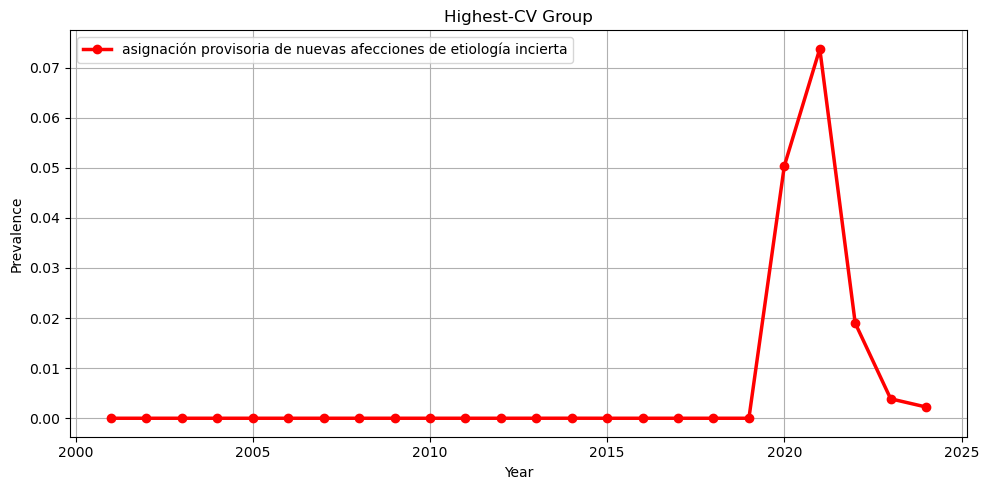

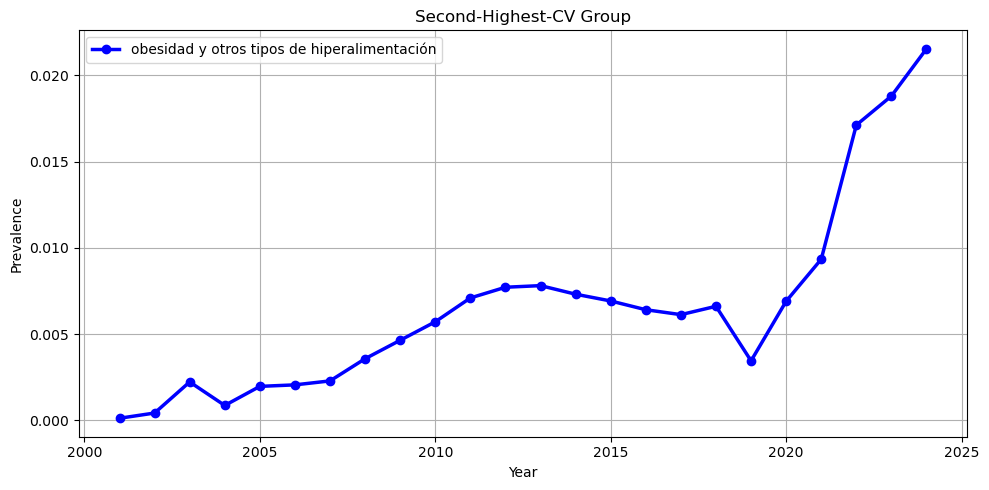

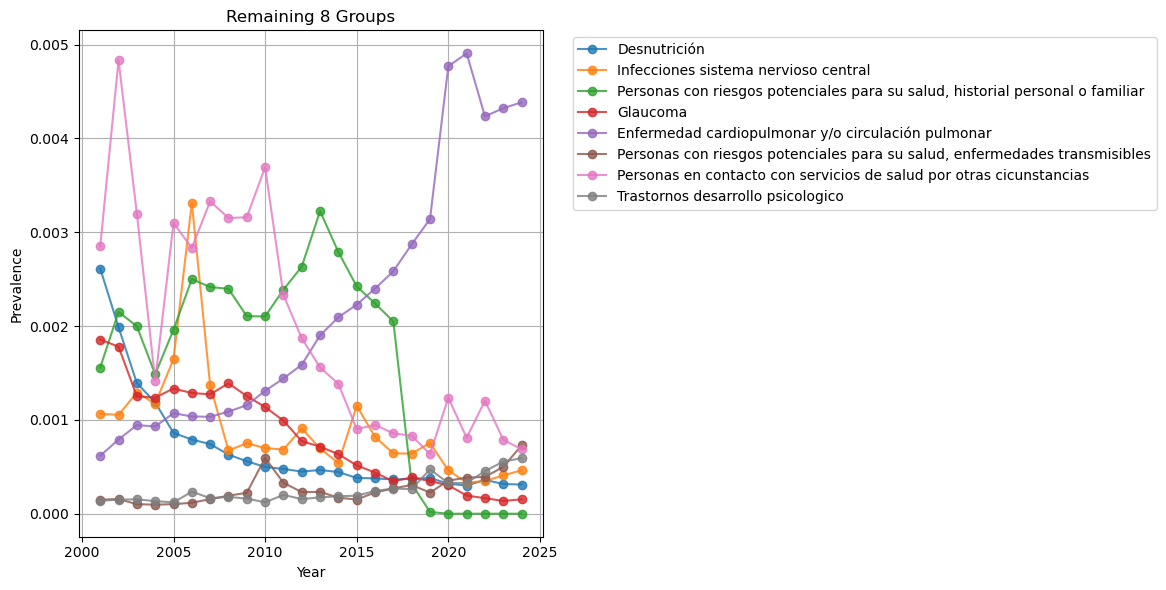

In [117]:
import matplotlib.pyplot as plt

# --- Manually specify the groups ---
highest_group = "asignación provisoria de nuevas afecciones de etiología incierta"
second_highest_group = "obesidad y otros tipos de hiperalimentación"  # replace with the actual second-highest group
other_groups = plot_top10.drop([highest_group, second_highest_group])

# Custom labels for the remaining 8 groups
custom_labels_other8 = [
    "Desnutrición",
    "Infecciones sistema nervioso central",
    "Personas con riesgos potenciales para su salud, historial personal o familiar",
    "Glaucoma",
    "Enfermedad cardiopulmonar y/o circulación pulmonar",
    "Personas con riesgos potenciales para su salud, enfermedades transmisibles",
    "Personas en contacto con servicios de salud por otras cicunstancias",
    "Trastornos desarrollo psicologico"
]

# --- Plot 1: Highest-prevalence group ---
plt.figure(figsize=(10,5))
plt.plot(plot_top10.columns, plot_top10.loc[highest_group],
         color='red', marker='o', linewidth=2.5, label=highest_group)
plt.title("Highest-CV Group")
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 2: Second-highest-prevalence group ---
plt.figure(figsize=(10,5))
plt.plot(plot_top10.columns, plot_top10.loc[second_highest_group],
         color='blue', marker='o', linewidth=2.5, label=second_highest_group)
plt.title("Second-Highest-CV Group")
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 3: Remaining 8 groups ---
plt.figure(figsize=(12,6))
for i, group in enumerate(other_groups.index):
    label = custom_labels_other8[i] if i < len(custom_labels_other8) else group
    plt.plot(plot_top10.columns, other_groups.loc[group],
             marker='o', linewidth=1.5, alpha=0.8, label=label)
plt.title("Remaining 8 Groups")
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [118]:
# Filter to keep just top 10 groups with highest mean
top10_mean = prevalence.sort_values(by = "mean", ascending = False).head(10)

In [119]:
# Keep year columns to plot
plot_top10_mean = top10_mean.iloc[:, 0:24] * 100

In [120]:
plot_top10_mean

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
group names,,,,,,,,,,,,,,,,,,,,,
"trastornos de la vesícula biliar, de las vías biliares y del páncreas",2.36239,4.58616,4.70279,2.80750,4.67960,4.77339,5.03054,5.19231,5.22527,5.37035,...,6.67826,6.85527,6.92708,6.72889,4.38678,6.82807,7.29091,7.24195,6.56891,6.50362
influenza [gripe] y neumonía,8.84952,6.69298,5.99276,7.12206,6.39967,5.68625,6.17827,5.30337,6.36593,6.39866,...,4.68493,4.90009,4.57564,4.27374,4.67334,2.91419,2.27119,3.02951,4.16546,4.34996
enfermedades del apéndice,3.84580,3.45634,3.47152,4.03217,3.61891,3.49484,3.37302,3.37204,3.32330,3.38539,...,3.18956,3.00087,2.97281,2.82574,3.18410,3.37749,2.85087,2.44747,2.34528,2.24392
otras formas de enfermedad del corazón,2.39765,2.34958,2.24613,2.59120,2.31291,2.34534,2.52303,2.54764,2.55400,2.69410,...,2.80931,2.78269,2.88611,2.84457,3.04707,2.97905,2.69713,2.83947,2.98305,2.88266
hernia,3.25140,2.74080,2.68967,3.31547,2.66549,2.38907,2.31978,2.41630,2.35265,2.21901,...,2.59954,2.63812,2.67006,2.65442,3.13615,1.97407,2.32917,2.65260,2.35726,2.32825
otras enfermedades de las vías respiratorias superiores,1.98425,1.87508,2.53507,2.80863,2.46542,2.42779,2.55890,2.58374,2.59332,2.44741,...,2.55493,2.52945,2.41104,2.58743,2.50909,1.62952,1.66891,1.98673,1.91404,2.40489
enfermedades cerebrovasculares,1.76750,1.75427,1.60571,1.71749,1.58852,1.72391,1.94370,2.07088,2.04218,2.15263,...,2.32906,2.35460,2.32121,2.32938,2.56753,2.67110,2.43836,2.44544,2.58659,2.60586
enfermedades de los órganos genitales masculinos,3.38684,1.62830,1.92809,3.92724,1.80352,1.70395,1.65055,1.75272,1.70606,1.68045,...,1.93700,1.96046,2.01821,2.06996,4.13586,1.85370,2.10229,2.21783,1.97533,2.12194
trastornos no inflamatorios de los órganos genitales femeninos,0.00000,2.24392,2.57349,0.00000,2.67250,2.48734,2.47376,2.44623,2.37363,2.26170,...,2.18556,2.20901,2.29057,2.24274,0.00000,1.77155,2.04033,2.19381,2.19399,2.25125


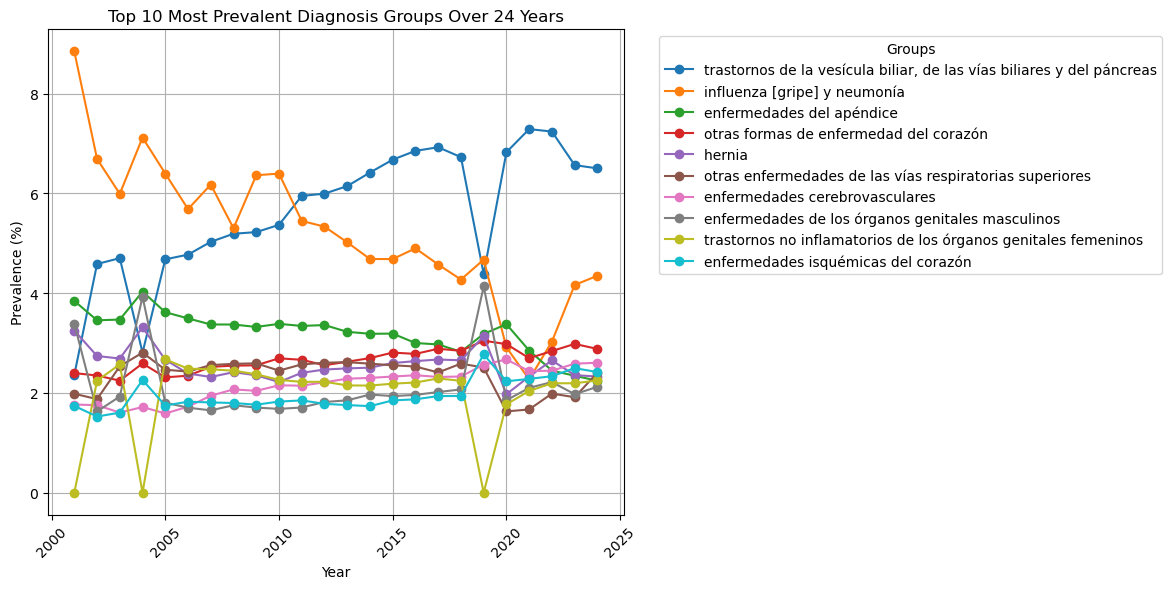

In [121]:
import matplotlib.pyplot as plt

# Plot all top 10 groups
plt.figure(figsize=(12, 6))

for group in plot_top10_mean.index:
    plt.plot(plot_top10_mean.columns, plot_top10_mean.loc[group], marker='o', label=group)

plt.title("Top 10 Most Prevalent Diagnosis Groups Over 24 Years")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # if your values are already percentages
plt.xticks(rotation=45)
plt.legend(title="Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 1.f Statistical Check (Optional):

# 1.g key Insights and Context

# 1.h Notes / Next Steps

# 1. Pair 2: [Age] × [Length of stay]


# 2 Counts / Crosstab / Summary Table


In [127]:
# Create a function to create IQR value columns.
def iqr(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

In [128]:
# Groupby age range aggregating different values related to LOS.
LOS_age_distr = df.groupby("age").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),
                     median_LOS_capped=("LOS_capped", "median"), std_LOS_raw=("length of stay", "std"), std_LOS_capped=("LOS_capped", "std"),
                     max_LOS_raw=("length of stay", "max"), max_LOS_capped=("LOS_capped", "max"),
                     IQR_LOS_raw=("length of stay", iqr), IQR_LOS_capped=("LOS_capped", iqr)).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\328509724.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LOS_age_distr = df.groupby("age").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),


In [129]:
LOS_age_distr

,age,mean_LOS_raw,mean_LOS_capped,median_LOS_raw,median_LOS_capped,std_LOS_raw,std_LOS_capped,max_LOS_raw,max_LOS_capped,IQR_LOS_raw,IQR_LOS_capped
0,0-1,7.43021,7.17320,3.00000,3.00000,21.10805,14.76917,5890,176,5.00000,5.00000
1,1-9,3.90411,3.63387,2.00000,2.00000,24.92400,8.86870,14408,176,3.00000,3.00000
2,10-19,4.60072,4.45588,2.00000,2.00000,32.02374,9.08069,20949,176,3.00000,3.00000
3,20-29,5.49952,4.89705,2.00000,2.00000,70.24406,10.81223,22566,176,3.00000,3.00000
4,30-39,5.39481,4.75532,2.00000,2.00000,64.43214,10.44882,18859,176,3.00000,3.00000
5,40-49,6.09537,5.34169,2.00000,2.00000,69.19381,10.86832,23308,176,4.00000,4.00000
6,50-59,7.19590,6.48760,3.00000,3.00000,65.65641,11.93638,16381,176,6.00000,6.00000
7,60-69,8.12260,7.55292,4.00000,4.00000,61.73981,12.53721,24837,176,7.00000,7.00000
8,70-79,8.83886,8.32771,5.00000,5.00000,62.20996,12.52897,29235,176,8.00000,8.00000
9,80-120,9.17574,8.51261,5.00000,5.00000,81.22627,11.51089,32452,176,8.00000,8.00000


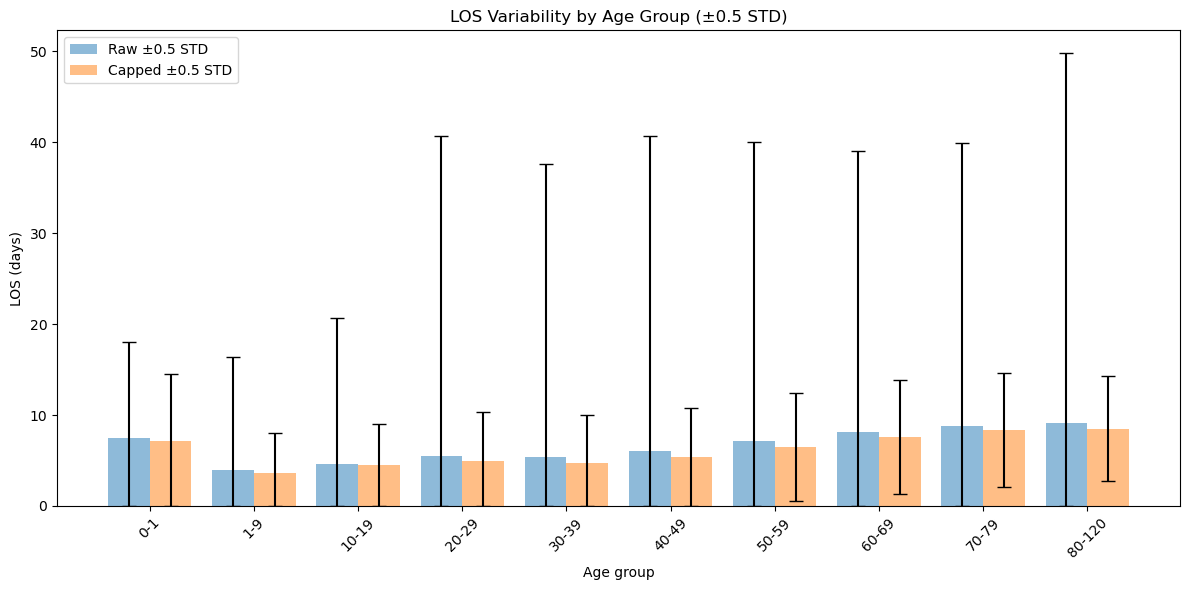

In [130]:
import numpy as np
import matplotlib.pyplot as plt


ages = LOS_age_distr["age"]
x = np.arange(len(ages))
bar_width = 0.4

# Multiplier for error bars
multiplier = 0.5

# Compute asymmetric error bars, clipping lower bound at 0
yerr_raw = np.array([
    np.minimum(multiplier * LOS_age_distr["std_LOS_raw"], LOS_age_distr["mean_LOS_raw"]),  # lower
    multiplier * LOS_age_distr["std_LOS_raw"]                                             # upper
])
yerr_capped = np.array([
    np.minimum(multiplier * LOS_age_distr["std_LOS_capped"], LOS_age_distr["mean_LOS_capped"]),
    multiplier * LOS_age_distr["std_LOS_capped"]
])

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for raw
ax.bar(x - bar_width/2, LOS_age_distr["mean_LOS_raw"], width=bar_width,
       yerr=yerr_raw, capsize=5, alpha=0.5, label="Raw ±0.5 STD")

# Bars for capped
ax.bar(x + bar_width/2, LOS_age_distr["mean_LOS_capped"], width=bar_width,
       yerr=yerr_capped, capsize=5, alpha=0.5, label="Capped ±0.5 STD")

# Formatting
ax.set_title("LOS Variability by Age Group (±0.5 STD)")
ax.set_xlabel("Age group")
ax.set_ylabel("LOS (days)")
ax.set_xticks(x)
ax.set_xticklabels(ages, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


# 3 Proportions

# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread


# 6 Visualization(s)

In [135]:
pair2_sample = df.sample(frac=0.01, random_state=21)

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\2753522629.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("age")["LOS_capped"]


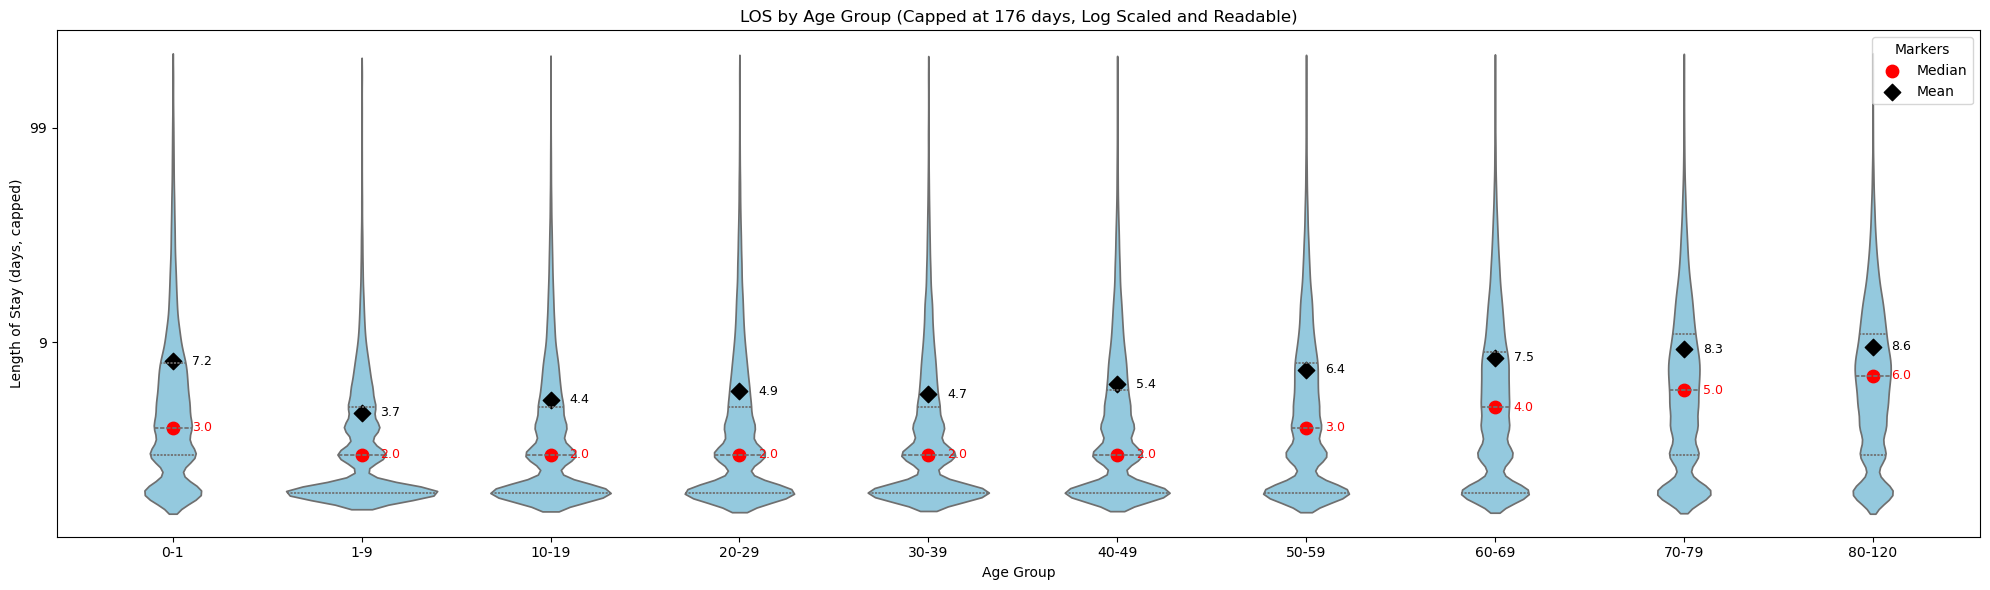

In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log-transform LOS (avoid log(0))
pair2_sample["log_LOS_capped"] = np.log10(pair2_sample["LOS_capped"] + 1)

plt.figure(figsize=(20, 6))
ax = sns.violinplot(
    data=pair2_sample,
    x="age",
    y="log_LOS_capped",
    inner="quartile",
    color="skyblue"
)

plt.title("LOS by Age Group (Capped at 176 days, Log Scaled and Readable)")

# ---- Compute medians and means ----
summary_stats = (
    pair2_sample
    .groupby("age")["LOS_capped"]
    .agg(["median", "mean"])
    .reset_index()
)

# ---- Dynamic tick labels ----
max_val = pair2_sample["LOS_capped"].max()
max_tick = int(np.ceil(np.log10(max_val + 1)))
yticks = np.arange(0, max_tick + 1)
plt.yticks(yticks, [f"{int(10**y - 1)}" for y in yticks])

plt.ylabel("Length of Stay (days, capped)")
plt.xlabel("Age Group")

# ---- Overlay median and mean markers ----
for i, row in summary_stats.iterrows():
    x = i
    median_y = np.log10(row["median"] + 1)
    mean_y = np.log10(row["mean"] + 1)

    # Median marker
    ax.scatter(x, median_y, color="red", marker="o", s=80, label="Median" if i == 0 else "")
    ax.text(x + 0.1, median_y, f"{row['median']:.1f}", color="red", va="center", fontsize=9)

    # Mean marker
    ax.scatter(x, mean_y, color="black", marker="D", s=70, label="Mean" if i == 0 else "")
    ax.text(x + 0.1, mean_y, f"{row['mean']:.1f}", color="black", va="center", fontsize=9)

# ---- Legend ----
ax.legend(title="Markers", loc="upper right")

plt.tight_layout()
plt.show()


# 7 Statistical Check (Just information to myself):

# 8 key Insights and Context

# 9 Notes / Next Steps

# 1. Pair 3: [Healthcare facility type] × [Length of stay]





# 2 Counts / Crosstab / Summary Table


In [142]:
# Group central and dispersion measures by facility type
LOS_hft_distr = df.groupby("healthcare facility type").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),
                     median_LOS_capped=("LOS_capped", "median"), std_LOS_raw=("length of stay", "std"), std_LOS_capped=("LOS_capped", "std"),
                     max_LOS_raw=("length of stay", "max"), max_LOS_capped=("LOS_capped", "max"),
                     IQR_LOS_raw=("length of stay", iqr), IQR_LOS_capped=("LOS_capped", iqr)).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\373617189.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LOS_hft_distr = df.groupby("healthcare facility type").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),


In [143]:
LOS_hft_distr

,healthcare facility type,mean_LOS_raw,mean_LOS_capped,median_LOS_raw,median_LOS_capped,std_LOS_raw,std_LOS_capped,max_LOS_raw,max_LOS_capped,IQR_LOS_raw,IQR_LOS_capped
0,Private,4.32215,3.74899,2.00000,2.00000,68.20164,9.18289,32452,176,2.00000,2.00000
1,Public,7.72873,7.20130,4.00000,4.00000,56.58142,12.32949,26855,176,6.00000,6.00000
2,Unknown,6.88912,6.41266,3.00000,3.00000,55.19930,12.37264,22239,176,6.00000,6.00000


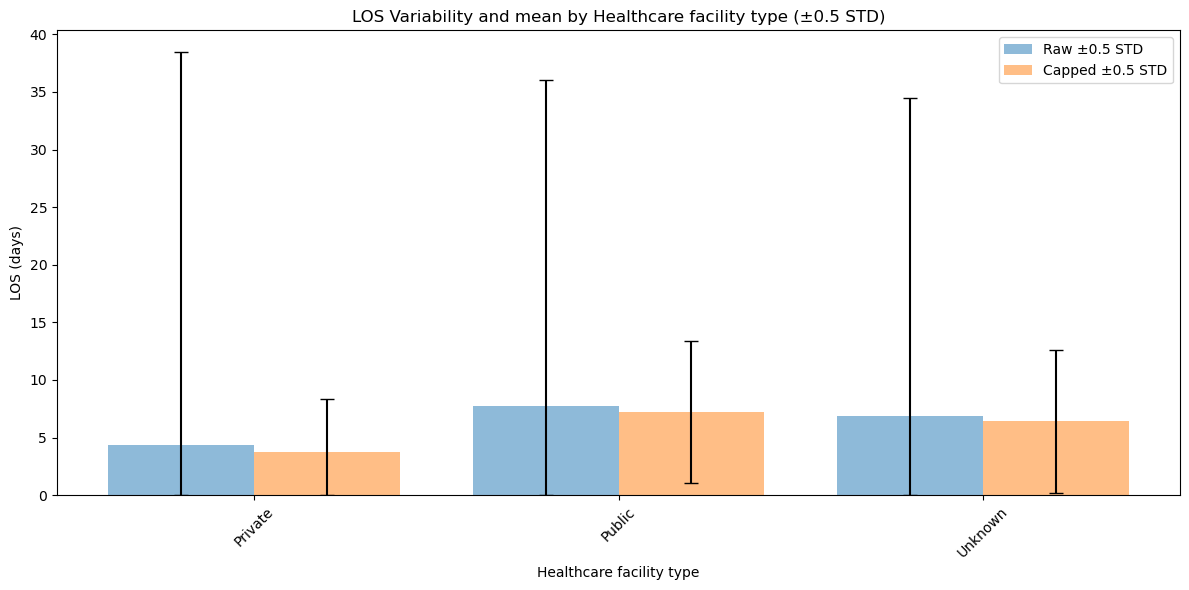

In [144]:

types = LOS_hft_distr["healthcare facility type"]
x = np.arange(len(types))
bar_width = 0.4

# Multiplier for error bars
multiplier = 0.5

# Compute asymmetric error bars, clipping lower bound at 0
yerr_raw = np.array([
    np.minimum(multiplier * LOS_hft_distr["std_LOS_raw"], LOS_hft_distr["mean_LOS_raw"]),  # lower
    multiplier * LOS_hft_distr["std_LOS_raw"]                                             # upper
])
yerr_capped = np.array([
    np.minimum(multiplier * LOS_hft_distr["std_LOS_capped"], LOS_hft_distr["mean_LOS_capped"]),
    multiplier * LOS_hft_distr["std_LOS_capped"]
])

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for raw
ax.bar(x - bar_width/2, LOS_hft_distr["mean_LOS_raw"], width=bar_width,
       yerr=yerr_raw, capsize=5, alpha=0.5, label="Raw ±0.5 STD")

# Bars for capped
ax.bar(x + bar_width/2, LOS_hft_distr["mean_LOS_capped"], width=bar_width,
       yerr=yerr_capped, capsize=5, alpha=0.5, label="Capped ±0.5 STD")

# Formatting
ax.set_title("LOS Variability and mean by Healthcare facility type (±0.5 STD)")
ax.set_xlabel("Healthcare facility type")
ax.set_ylabel("LOS (days)")
ax.set_xticks(x)
ax.set_xticklabels(types, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



# 3 Proportions

# 4 Outlier / Distribution Analysis (if numerical)

# 5 Central Tendency & Spread


# 6 Visualization(s)

In [149]:
# Sample of the data because of memory usage issues if raw full data is taken
pair3_sample = df.sample(frac=0.01, random_state=44)

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\3438777605.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("healthcare facility type")["LOS_capped"]


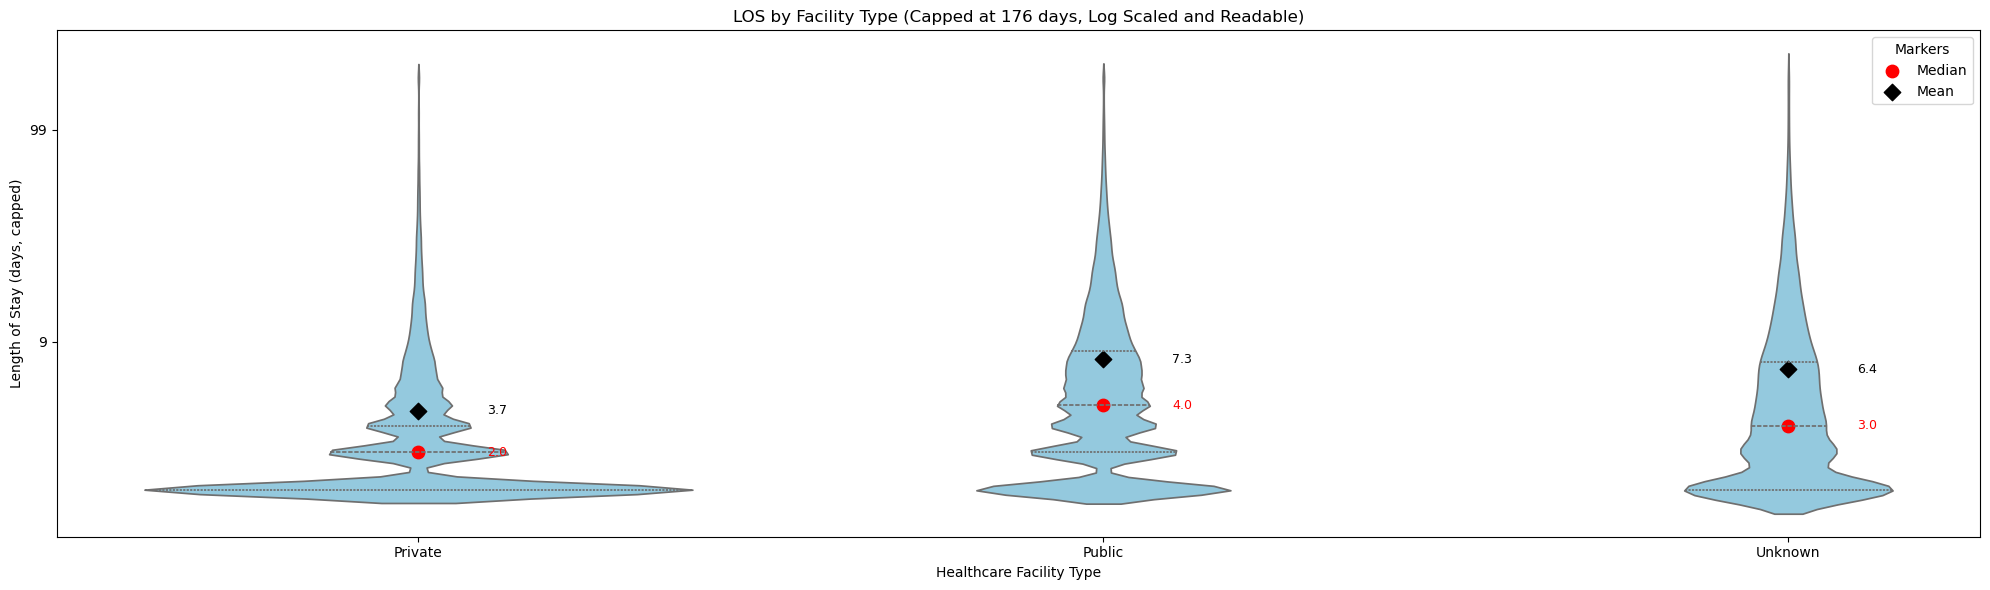

In [150]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log-transform LOS to avoid distortion in violin plot
pair3_sample["log_LOS_capped"] = np.log10(pair3_sample["LOS_capped"] + 1)

plt.figure(figsize=(20, 6))
ax = sns.violinplot(
    data=pair3_sample,
    x="healthcare facility type",
    y="log_LOS_capped",
    inner="quartile",
    color="skyblue"
)

plt.title("LOS by Facility Type (Capped at 176 days, Log Scaled and Readable)")

# ---- Compute median and mean per facility type ----
summary_stats = (
    pair3_sample
    .groupby("healthcare facility type")["LOS_capped"]
    .agg(["median", "mean"])
    .reset_index()
)

# ---- Dynamic tick labels ----
max_val = pair3_sample["LOS_capped"].max()
max_tick = int(np.ceil(np.log10(max_val + 1)))
yticks = np.arange(0, max_tick + 1)
plt.yticks(yticks, [f"{int(10**y - 1)}" for y in yticks])

plt.ylabel("Length of Stay (days, capped)")
plt.xlabel("Healthcare Facility Type")

# ---- Overlay median and mean markers + annotate ----
for i, row in summary_stats.iterrows():
    x = i
    median_y = np.log10(row["median"] + 1)
    mean_y = np.log10(row["mean"] + 1)

    # Median (red circle)
    ax.scatter(x, median_y, color="red", marker="o", s=80, label="Median" if i == 0 else "")
    ax.text(x + 0.1, median_y, f"{row['median']:.1f}", color="red", va="center", fontsize=9)

    # Mean (black diamond)
    ax.scatter(x, mean_y, color="black", marker="D", s=70, label="Mean" if i == 0 else "")
    ax.text(x + 0.1, mean_y, f"{row['mean']:.1f}", color="black", va="center", fontsize=9)

# ---- Legend ----
ax.legend(title="Markers", loc="upper right")

plt.tight_layout()
plt.show()


# 7 Statistical Check (Optional): Modeling ESTO ESTA PENDIENTE!!

# 8 key Insights and Context

# 9 Notes / Next Steps


# 1. Pair 4: [Insurance] × [LOS]

# 2 Counts / Crosstab / Summary Table


In [156]:
# Group LOS measures by heath insurance
LOS_insurance_distr = df.groupby("health insurance").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),
                     median_LOS_capped=("LOS_capped", "median"), std_LOS_raw=("length of stay", "std"), std_LOS_capped=("LOS_capped", "std"),
                     max_LOS_raw=("length of stay", "max"), max_LOS_capped=("LOS_capped", "max"),
                     IQR_LOS_raw=("length of stay", iqr), IQR_LOS_capped=("LOS_capped", iqr)).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\2654230784.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LOS_insurance_distr = df.groupby("health insurance").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),


In [157]:
LOS_insurance_distr

,health insurance,mean_LOS_raw,mean_LOS_capped,median_LOS_raw,median_LOS_capped,std_LOS_raw,std_LOS_capped,max_LOS_raw,max_LOS_capped,IQR_LOS_raw,IQR_LOS_capped
0,Fonasa,7.53538,6.89324,3.00000,3.00000,65.61361,12.37475,29924,176,6.00000,6.00000
1,Isapre,3.57898,3.46826,2.00000,2.00000,26.00760,7.48240,32452,176,2.00000,2.00000


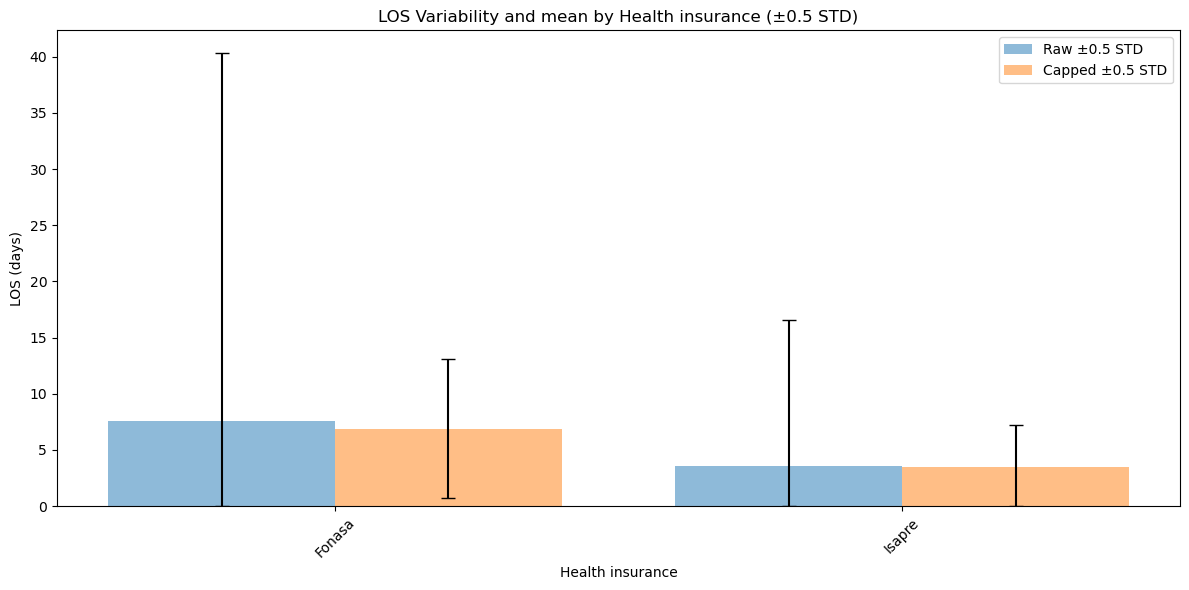

In [158]:
ins = LOS_insurance_distr["health insurance"]
x = np.arange(len(ins))
bar_width = 0.4

# Multiplier for error bars
multiplier = 0.5

# Compute asymmetric error bars, clipping lower bound at 0
yerr_raw = np.array([
    np.minimum(multiplier * LOS_insurance_distr["std_LOS_raw"], LOS_insurance_distr["mean_LOS_raw"]),  # lower
    multiplier * LOS_insurance_distr["std_LOS_raw"]                                             # upper
])
yerr_capped = np.array([
    np.minimum(multiplier * LOS_insurance_distr["std_LOS_capped"], LOS_insurance_distr["mean_LOS_capped"]),
    multiplier * LOS_insurance_distr["std_LOS_capped"]
])

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for raw
ax.bar(x - bar_width/2, LOS_insurance_distr["mean_LOS_raw"], width=bar_width,
       yerr=yerr_raw, capsize=5, alpha=0.5, label="Raw ±0.5 STD")

# Bars for capped
ax.bar(x + bar_width/2, LOS_insurance_distr["mean_LOS_capped"], width=bar_width,
       yerr=yerr_capped, capsize=5, alpha=0.5, label="Capped ±0.5 STD")

# Formatting
ax.set_title("LOS Variability and mean by Health insurance (±0.5 STD)")
ax.set_xlabel("Health insurance")
ax.set_ylabel("LOS (days)")
ax.set_xticks(x)
ax.set_xticklabels(ins, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# 3 Proportions

In [160]:
normalized_insurance

healthcare facility type,Private,Public,Unknown
health insurance,,,
Fonasa,0.35797,0.98302,0.79739
Isapre,0.64203,0.01698,0.20261


# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread

# 6 Visualization(s)

In [164]:
pair4_sample = df.sample(frac=0.01, random_state=88)

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\296215852.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("health insurance")["LOS_capped"]


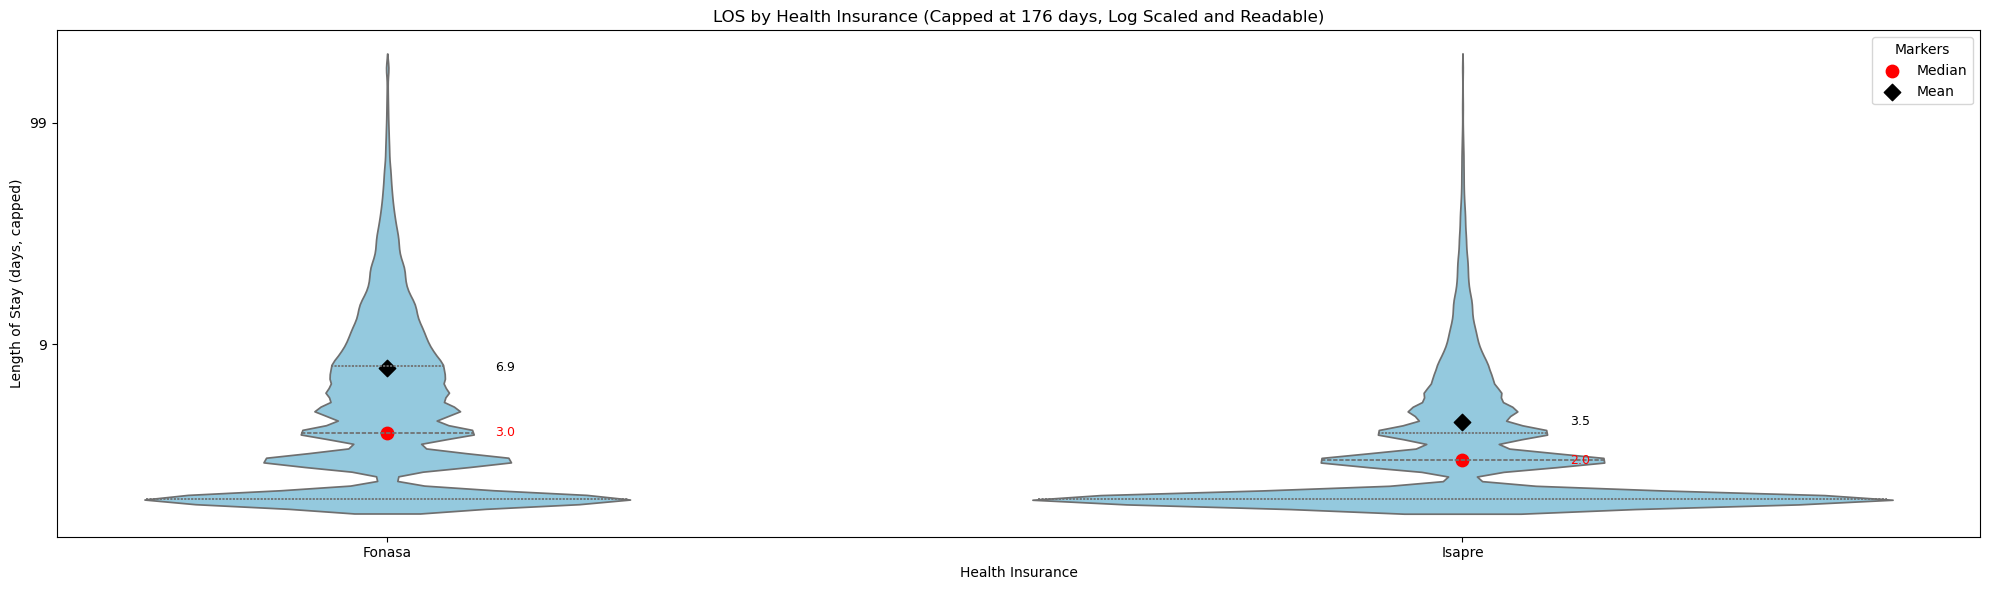

In [165]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log-transform LOS (avoid log(0))
pair4_sample["log_LOS_capped"] = np.log10(pair4_sample["LOS_capped"] + 1)

plt.figure(figsize=(20, 6))
ax = sns.violinplot(
    data=pair4_sample,
    x="health insurance",
    y="log_LOS_capped",
    inner="quartile",
    color="skyblue"
)

plt.title("LOS by Health Insurance (Capped at 176 days, Log Scaled and Readable)")

# ---- Compute median and mean per health insurance type ----
summary_stats = (
    pair4_sample
    .groupby("health insurance")["LOS_capped"]
    .agg(["median", "mean"])
    .reset_index()
)

# ---- Dynamic tick labels ----
max_val = pair4_sample["LOS_capped"].max()
max_tick = int(np.ceil(np.log10(max_val + 1)))
yticks = np.arange(0, max_tick + 1)
plt.yticks(yticks, [f"{int(10**y - 1)}" for y in yticks])

plt.ylabel("Length of Stay (days, capped)")
plt.xlabel("Health Insurance")

# ---- Overlay median and mean markers + annotate ----
for i, row in summary_stats.iterrows():
    x = i
    median_y = np.log10(row["median"] + 1)
    mean_y = np.log10(row["mean"] + 1)

    # Median (red circle)
    ax.scatter(x, median_y, color="red", marker="o", s=80, label="Median" if i == 0 else "")
    ax.text(x + 0.1, median_y, f"{row['median']:.1f}", color="red", va="center", fontsize=9)

    # Mean (black diamond)
    ax.scatter(x, mean_y, color="black", marker="D", s=70, label="Mean" if i == 0 else "")
    ax.text(x + 0.1, mean_y, f"{row['mean']:.1f}", color="black", va="center", fontsize=9)

# ---- Legend ----
ax.legend(title="Markers", loc="upper right")

plt.tight_layout()
plt.show()


# 7 Statistical Check (Optional)

# 8 key Insights and Context

# 9 Notes / Next Steps

# 1. Pair 5: [Year] × [LOS]


# 2 Counts / Crosstab / Summary Table


In [171]:
# Group LOS measures by year
LOS_year_distr = df.groupby("year").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),
                     median_LOS_capped=("LOS_capped", "median"), std_LOS_raw=("length of stay", "std"), std_LOS_capped=("LOS_capped", "std"),
                     max_LOS_raw=("length of stay", "max"), max_LOS_capped=("LOS_capped", "max"),
                     IQR_LOS_raw=("length of stay", iqr), IQR_LOS_capped=("LOS_capped", iqr), count_per_year = ("year", "count")).reset_index()

In [172]:
LOS_year_distr

,year,mean_LOS_raw,mean_LOS_capped,median_LOS_raw,median_LOS_capped,std_LOS_raw,std_LOS_capped,max_LOS_raw,max_LOS_capped,IQR_LOS_raw,IQR_LOS_capped,count_per_year
0,2001,7.71498,7.16462,4.00000,4.00000,63.78440,12.92512,21537,176,7.00000,7.00000,408316
1,2002,7.42027,6.63239,3.00000,3.00000,72.25506,11.89797,23846,176,5.00000,5.00000,871644
2,2003,6.80845,5.99920,3.00000,3.00000,69.88081,11.20982,23308,176,5.00000,5.00000,1085376
3,2004,7.00941,6.24594,3.00000,3.00000,76.16673,11.58377,32452,176,6.00000,6.00000,527979
4,2005,6.32270,5.70809,3.00000,3.00000,74.84169,10.25882,24837,176,5.00000,5.00000,1112104
5,2006,6.22956,5.75542,3.00000,3.00000,51.98934,10.52943,20100,176,5.00000,5.00000,1157019
6,2007,6.43726,5.96933,3.00000,3.00000,53.29449,10.82267,17446,176,5.00000,5.00000,1134590
7,2008,6.43434,5.97231,3.00000,3.00000,56.05794,10.99447,23947,176,5.00000,5.00000,1119232
8,2009,6.30205,5.90800,3.00000,3.00000,38.15629,10.81480,9283,176,5.00000,5.00000,1177565
9,2010,6.78693,5.99010,3.00000,3.00000,87.63337,11.04396,29924,176,5.00000,5.00000,1131361


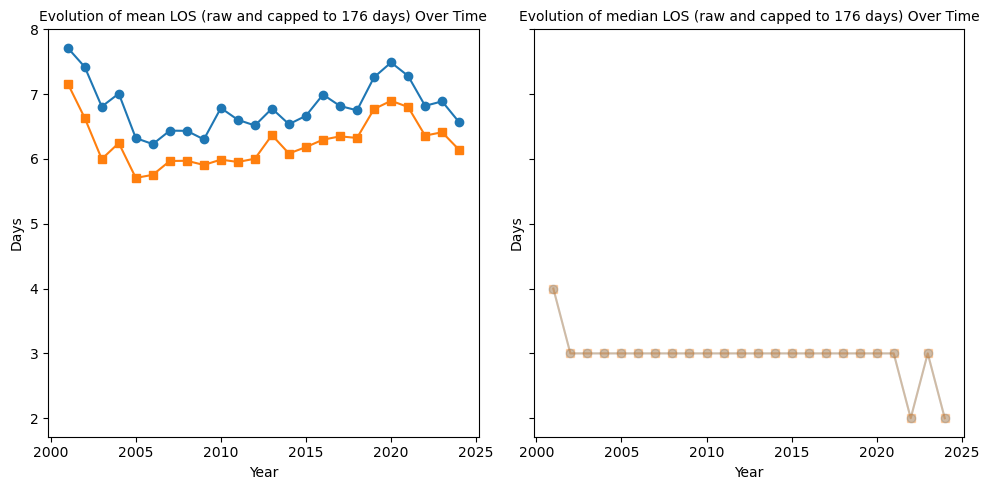

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


axes[0].plot(LOS_year_distr["year"], LOS_year_distr["mean_LOS_raw"], label="mean_LOS_raw", marker="o")
axes[0].plot(LOS_year_distr["year"], LOS_year_distr["mean_LOS_capped"], label="mean_LOS_capped", marker="s")

axes[0].set_xlabel("Year")
axes[0].set_ylabel("Days")
axes[0].set_title("Evolution of mean LOS (raw and capped to 176 days) Over Time", fontsize = 10)


# Plot 2


axes[1].plot(LOS_year_distr["year"], LOS_year_distr["median_LOS_raw"], label="median_LOS_raw", marker="o", alpha = 0.3)
axes[1].plot(LOS_year_distr["year"], LOS_year_distr["median_LOS_capped"], label="median_LOS_capped", marker="s", alpha = 0.3)

axes[1].set_xlabel("Year")
axes[1].set_ylabel("Days")
axes[1].set_title("Evolution of median LOS (raw and capped to 176 days) Over Time", fontsize = 10)


plt.tight_layout()
plt.show()


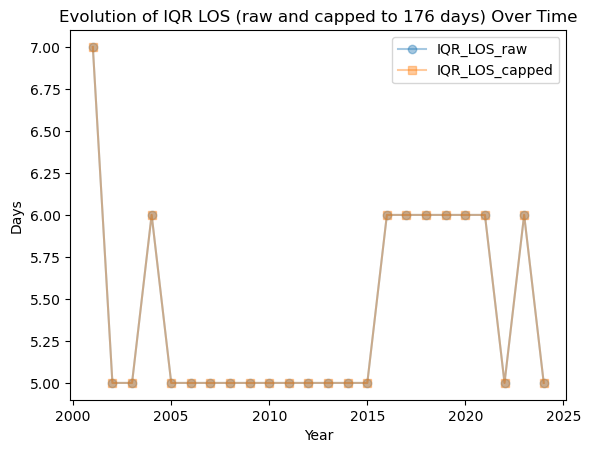

In [174]:
plt.plot(LOS_year_distr["year"], LOS_year_distr["IQR_LOS_raw"], label="IQR_LOS_raw", marker="o", alpha = 0.4)
plt.plot(LOS_year_distr["year"], LOS_year_distr["IQR_LOS_capped"], label="IQR_LOS_capped", marker="s",alpha = 0.4)

plt.xlabel("Year")
plt.ylabel("Days")
plt.title("Evolution of IQR LOS (raw and capped to 176 days) Over Time")

plt.legend()
plt.show()

# 3 Proportions

# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread


# 6 Visualization(s)

In [179]:
# Sample of the data
pair5_sample = df.sample(frac=0.01, random_state=3344)

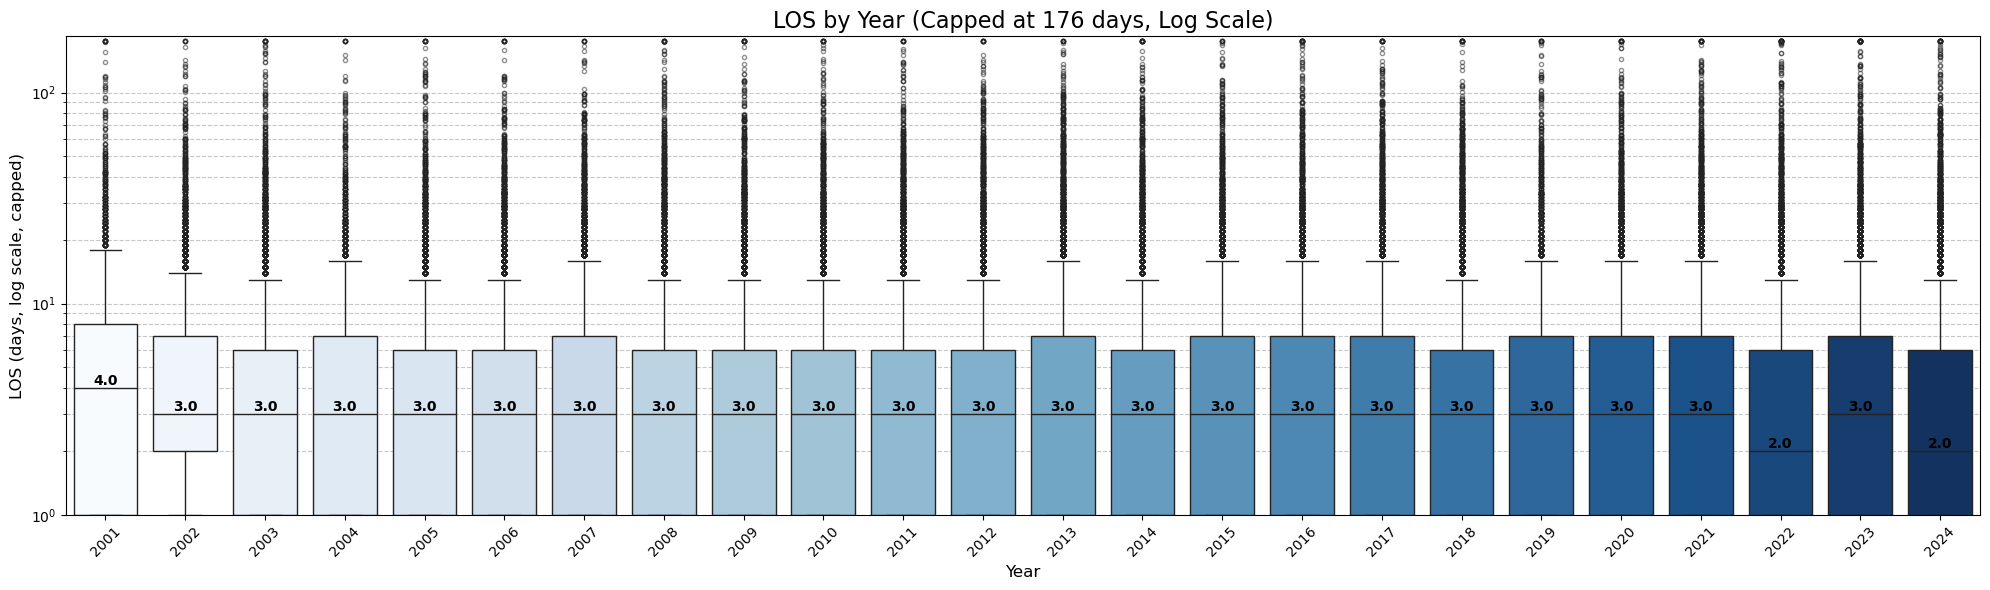

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))

# Boxplot
ax = sns.boxplot(
    data=pair4_sample,
    x="year",
    y="LOS_capped",
    hue = "year",
    palette="Blues",
    showfliers=True,
    legend = False,
    flierprops={"marker": "o", "markersize": 3, "alpha": 0.5}
)

plt.title("LOS by Year (Capped at 176 days, Log Scale)", fontsize=16)
plt.yscale("log")
plt.ylim(1, pair4_sample["LOS_capped"].max() * 1.05)
plt.ylabel("LOS (days, log scale, capped)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", which="both", linestyle="--", alpha=0.7)

# --- Annotate medians ---
medians = pair4_sample.groupby("year")["LOS_capped"].median()
positions = range(len(medians))

for pos, (year, median_val) in zip(positions, medians.items()):
    ax.text(
        pos, 
        median_val, 
        f"{median_val:.1f}",   # format (1 decimal place)
        ha="center", va="bottom", 
        fontsize=10, fontweight="bold", color="black"
    )

plt.tight_layout()
plt.show()


# 7 Statistical Check (Optional):

# 8 key Insights and Context

# 9 Notes / Next Steps

# 1. Pair 6: [Sex] × [LOS]


# 2 Counts / Crosstab / Summary Table


In [186]:
# Los measures by sex
LOS_sex_distr = df.groupby("sex").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),
                     median_LOS_capped=("LOS_capped", "median"), std_LOS_raw=("length of stay", "std"), std_LOS_capped=("LOS_capped", "std"),
                     max_LOS_raw=("length of stay", "max"), max_LOS_capped=("LOS_capped", "max"),
                     IQR_LOS_raw=("length of stay", iqr), IQR_LOS_capped=("LOS_capped", iqr)).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\994664796.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LOS_sex_distr = df.groupby("sex").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),


In [187]:
LOS_sex_distr

,sex,mean_LOS_raw,mean_LOS_capped,median_LOS_raw,median_LOS_capped,std_LOS_raw,std_LOS_capped,max_LOS_raw,max_LOS_capped,IQR_LOS_raw,IQR_LOS_capped
0,Male,7.28676,6.67257,3.00000,3.00000,58.87906,12.65241,32452,176,6.00000,6.00000
1,Female,6.19140,5.73558,3.00000,3.00000,61.05399,10.46886,29924,176,5.00000,5.00000


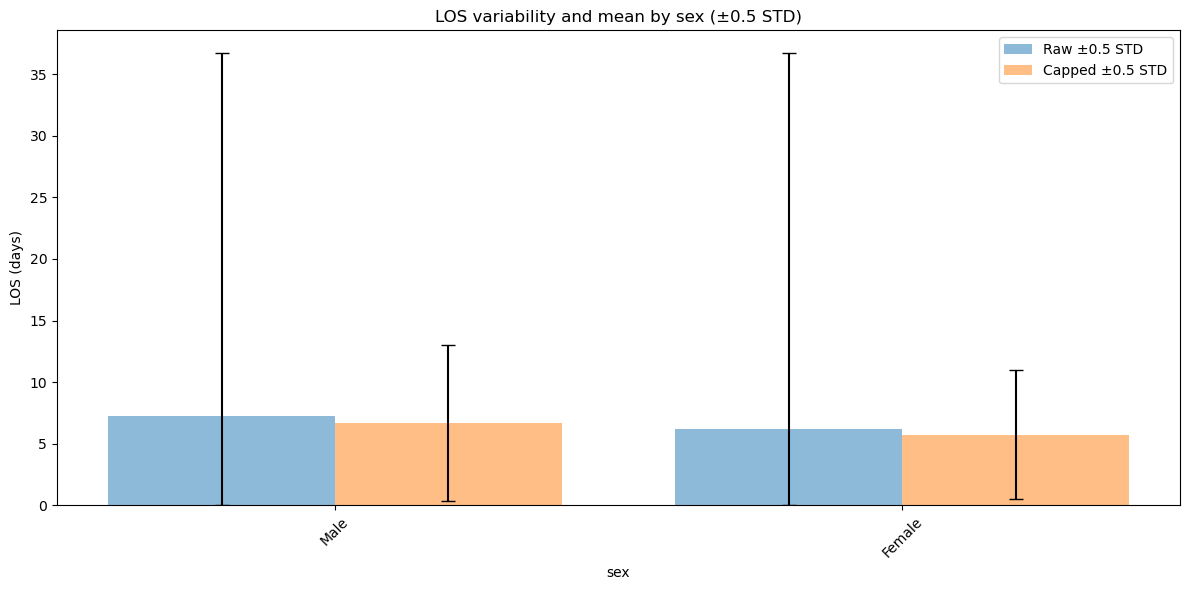

In [188]:
sex = LOS_sex_distr["sex"]
x = np.arange(len(ins))
bar_width = 0.4

# Multiplier for error bars
multiplier = 0.5

# Compute asymmetric error bars, clipping lower bound at 0
yerr_raw = np.array([
    np.minimum(multiplier * LOS_sex_distr["std_LOS_raw"], LOS_sex_distr["mean_LOS_raw"]),  # lower
    multiplier * LOS_sex_distr["std_LOS_raw"]                                             # upper
])
yerr_capped = np.array([
    np.minimum(multiplier * LOS_sex_distr["std_LOS_capped"], LOS_sex_distr["mean_LOS_capped"]),
    multiplier * LOS_sex_distr["std_LOS_capped"]
])

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for raw
ax.bar(x - bar_width/2, LOS_sex_distr["mean_LOS_raw"], width=bar_width,
       yerr=yerr_raw, capsize=5, alpha=0.5, label="Raw ±0.5 STD")

# Bars for capped
ax.bar(x + bar_width/2, LOS_sex_distr["mean_LOS_capped"], width=bar_width,
       yerr=yerr_capped, capsize=5, alpha=0.5, label="Capped ±0.5 STD")

# Formatting
ax.set_title("LOS variability and mean by sex (±0.5 STD)")
ax.set_xlabel("sex")
ax.set_ylabel("LOS (days)")
ax.set_xticks(x)
ax.set_xticklabels(sex, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# 3 Proportions


# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread


# 6 Visualization(s)


In [193]:
# Sample
pair6_sample = df.sample(frac=0.01, random_state=987)

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\1664155256.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("sex")["LOS_capped"]


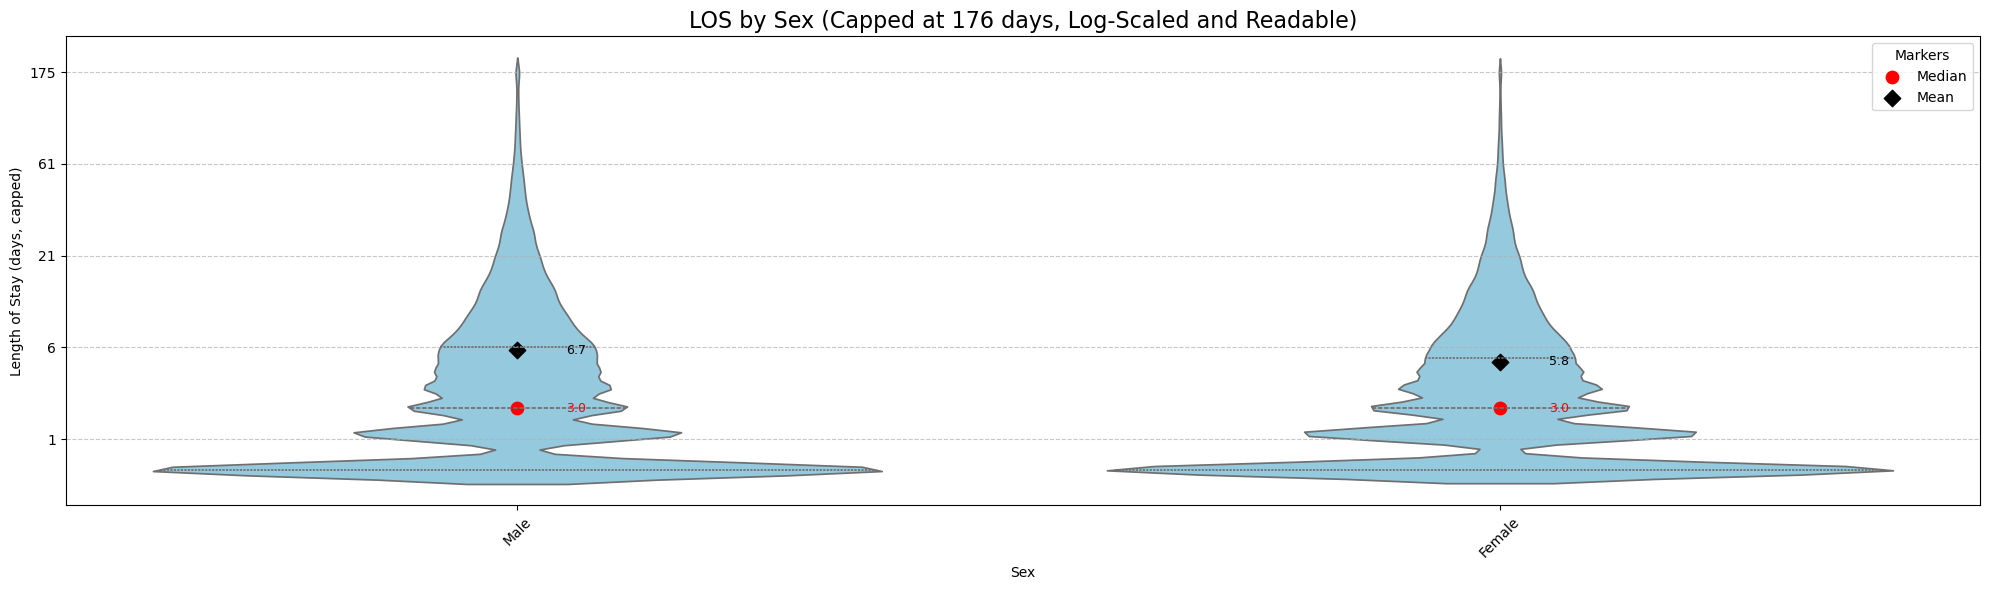

In [194]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Log-transform LOS (add +1 to avoid log(0)) ---
pair6_sample["log_LOS"] = np.log(pair6_sample["LOS_capped"] + 1)

plt.figure(figsize=(20, 6))
ax = sns.violinplot(
    data=pair6_sample,
    x="sex",
    y="log_LOS",
    inner="quartile",
    color="skyblue"
)

plt.title("LOS by Sex (Capped at 176 days, Log-Scaled and Readable)", fontsize=16)
plt.xlabel("Sex")
plt.ylabel("Length of Stay (days, capped)")

# --- Compute median and mean per sex ---
summary_stats = (
    pair6_sample
    .groupby("sex")["LOS_capped"]
    .agg(["median", "mean"])
    .reset_index()
)

# --- Dynamic y-ticks in linear scale (days) ---
max_val = pair6_sample["LOS_capped"].max()
# Define reasonable tick positions (log scale)
yticks = np.linspace(0, np.log(max_val + 1), num=6)
plt.yticks(yticks, [f"{int(np.exp(y) - 1)}" for y in yticks])

# --- Overlay median and mean markers + annotate ---
for i, row in summary_stats.iterrows():
    x = i
    median_y = np.log(row["median"] + 1)
    mean_y = np.log(row["mean"] + 1)

    # Median (red circle)
    ax.scatter(x, median_y, color="red", marker="o", s=80, label="Median" if i == 0 else "")
    ax.text(x + 0.05, median_y, f"{row['median']:.1f}", color="red", va="center", fontsize=9)

    # Mean (black diamond)
    ax.scatter(x, mean_y, color="black", marker="D", s=70, label="Mean" if i == 0 else "")
    ax.text(x + 0.05, mean_y, f"{row['mean']:.1f}", color="black", va="center", fontsize=9)

# --- Legend and layout ---
ax.legend(title="Markers", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 7 Statistical Check (Optional):


# 8 key Insights and Context

# 9 Notes / Next Steps

# 1. Pair 7: [Healthcare facility name] × [LOS]

# 2 Counts / Crosstab / Summary Table


In [200]:
# There are 475 facilities over the years 2001-2020 (2021-2024 does not have data about facilty names)
print(f"Number of hospitals: {df['healthcare facility name'].nunique()}")

Number of hospitals: 475


In [201]:
# LOS measures by individual facility.
LOS_hosp_distr = df.groupby("healthcare facility name").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),
                     median_LOS_capped=("LOS_capped", "median"), std_LOS_raw=("length of stay", "std"), std_LOS_capped=("LOS_capped", "std"),
                     max_LOS_raw=("length of stay", "max"), max_LOS_capped=("LOS_capped", "max"),
                     IQR_LOS_raw=("length of stay", iqr), IQR_LOS_capped=("LOS_capped", iqr)).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_20152\2921197487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LOS_hosp_distr = df.groupby("healthcare facility name").agg(mean_LOS_raw=("length of stay", "mean"), mean_LOS_capped=("LOS_capped", "mean"), median_LOS_raw=("length of stay", "median"),


In [202]:
# Sort values by IQR LOS capped in ascending order
LOS_hosp_distr.sort_values(by = "IQR_LOS_capped")

,healthcare facility name,mean_LOS_raw,mean_LOS_capped,median_LOS_raw,median_LOS_capped,std_LOS_raw,std_LOS_capped,max_LOS_raw,max_LOS_capped,IQR_LOS_raw,IQR_LOS_capped
182,Clínica Universidad de Chile Quilín,1.06483,1.06483,1.00000,1.00000,0.28962,0.28962,7,7,0.00000,0.00000
86,Clínica Fundación Gantz,1.24276,1.20646,1.00000,1.00000,6.07599,4.31954,334,176,0.00000,0.00000
205,Clínica del Norte,1.00442,1.00442,1.00000,1.00000,0.08576,0.08576,3,3,0.00000,0.00000
165,Clínica Santa Elena,2155.50000,176.00000,2155.50000,176.00000,2469.92399,0.00000,3902,176,1746.50000,0.00000
193,Clínica WLK,1.00549,1.00549,1.00000,1.00000,0.09562,0.09562,3,3,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
151,Clínica Salud Ltda.,370.09091,78.59091,47.50000,47.50000,918.18531,69.31155,5544,176,151.25000,151.25000
168,Clínica Santa Mariana IFREN,291.17966,84.23390,63.00000,63.00000,561.06626,68.62520,3500,176,197.00000,158.50000
90,Clínica Hogar de Cristo,248.00870,79.33913,55.00000,55.00000,645.19996,69.97166,4805,176,162.00000,161.00000
472,Servicios Clínicos Neuropsiquiátricos y Geriát...,229.89273,79.70242,42.00000,42.00000,419.31260,72.55664,3143,176,233.00000,162.00000


# 3 Proportions


# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread


# 6 Visualization(s)


In [207]:
pair7_sample = df.sample(frac=0.01, random_state=334)

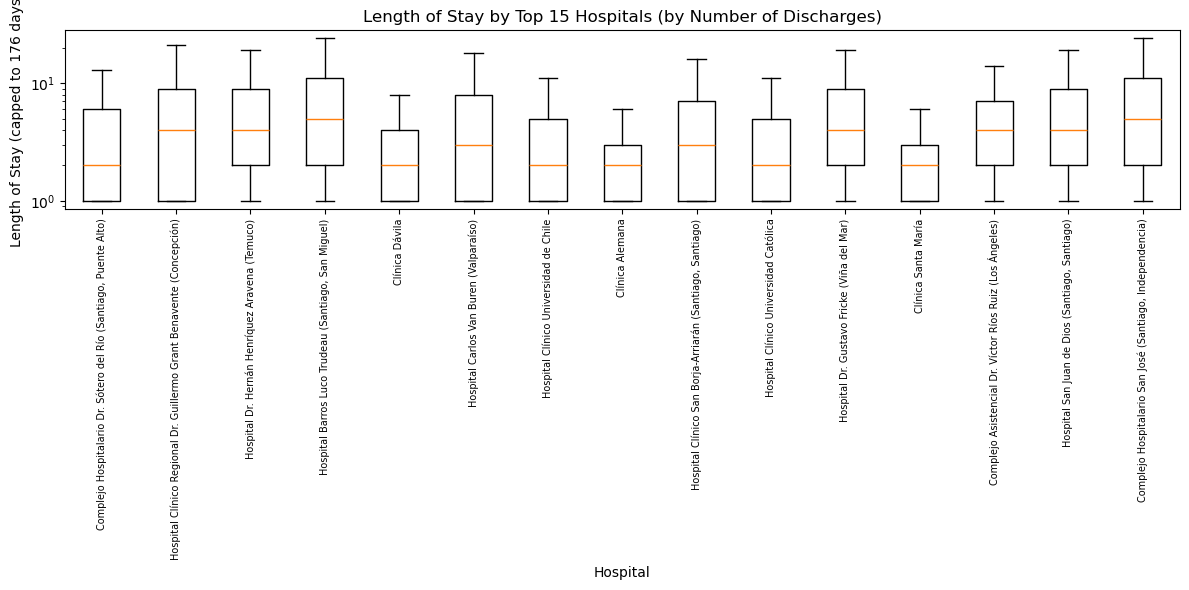

In [208]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Clean hospital names
df['healthcare facility name'] = df['healthcare facility name'].str.strip()

# 2️⃣ Exclude Unknown hospitals
df_clean = df[df['healthcare facility name'] != 'Unknown'].copy()

# 3️⃣ Identify top 15 hospitals by discharge count
top15_hospitals = df_clean['healthcare facility name'].value_counts().head(15).index

# 4️⃣ Filter for only the top 15 hospitals
df_top15_pair7 = df_clean[df_clean['healthcare facility name'].isin(top15_hospitals)].copy()

# 5️⃣ Prepare data for boxplot
data_to_plot = [
    df_top15_pair7.loc[df_top15_pair7['healthcare facility name'] == hospital, 'LOS_capped']
    for hospital in top15_hospitals
]

# 6️⃣ Plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot, showfliers=False)
plt.yscale('log')
plt.xticks(range(1, len(top15_hospitals) + 1), top15_hospitals, rotation=90, fontsize=7)
plt.title("Length of Stay by Top 15 Hospitals (by Number of Discharges)")
plt.xlabel("Hospital")
plt.ylabel("Length of Stay (capped to 176 days)")
plt.tight_layout()
plt.show()


In [209]:
median_order = (
    df_top15_pair7.groupby('healthcare facility name')['LOS_capped']
    .median()
    .sort_values()
    .index
)

data_to_plot = [
    df_top15_pair7.loc[df_top15_pair7['healthcare facility name'] == hospital, 'LOS_capped']
    for hospital in median_order
]

plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot, showfliers=False)
plt.yscale('log')
plt.xticks(range(1, len(median_order) + 1), median_order, rotation=90, fontsize = 7)
plt.title("Length of Stay by Top 15 Hospitals (Ordered by Median LOS)")
plt.xlabel("Hospital")
plt.ylabel("Length of Stay (capped to 176 days)")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

# Conditional Analysis 1: Stratify by Diagnosis (Case Mix)
Explore how hospital LOS differences behave within diagnostic categories.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Remove unknown hospitals
df_valid = df[df['healthcare facility name'] != 'Unknown'].copy()

# Step 1: Get top 5 hospitals
top_hosp = df_valid['healthcare facility name'].value_counts().nlargest(5).index

# Step 2: For each hospital, get its top 5 diagnoses
subset_list = []
for hosp in top_hosp:
    hosp_df = df_valid[df_valid['healthcare facility name'] == hosp]
    top_diag_hosp = hosp_df['group names'].value_counts().nlargest(5).index
    subset_list.append(hosp_df[hosp_df['group names'].isin(top_diag_hosp)])

subset_diag = pd.concat(subset_list, ignore_index=True)

# Step 3: Prepare data for plotting
data_to_plot = []
labels = []
colors = []

cmap = plt.get_cmap("Set2")
hospital_colors = {hosp: cmap(i) for i, hosp in enumerate(top_hosp)}

# Dictionary to map codes to full names for the legend
diag_name_map = subset_diag.set_index('group codes')['group names'].to_dict()

for hosp in top_hosp:
    hosp_df = subset_diag[subset_diag['healthcare facility name'] == hosp]
    top_diag_hosp = hosp_df['group names'].value_counts().nlargest(5).index
    top_codes_hosp = hosp_df[hosp_df['group names'].isin(top_diag_hosp)]['group codes'].unique()
    
    for code in top_codes_hosp:
        los = hosp_df.loc[hosp_df['group codes'] == code, 'LOS_capped']
        if len(los) > 0:
            data_to_plot.append(los)
            labels.append(code)  # only show diagnosis code on x-axis
            colors.append(hospital_colors[hosp])

# Step 4: Plot
plt.figure(figsize=(16, 6))
box = plt.boxplot(
    data_to_plot, patch_artist=True, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5)
)

# Color boxes by hospital
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.yscale('log')
plt.xticks(range(1, len(labels)+1), labels, rotation=90, fontsize=7)
plt.title("Length of Stay (capped to 176 days) — Top 5 Diagnoses per Top 5 Hospital")
plt.xlabel("Diagnosis Code")
plt.ylabel("Length of Stay (days)")

# Step 5: Legends
# Hospital legend (colors)
hospital_handles = [Patch(facecolor=hospital_colors[h], label=h) for h in top_hosp]
legend1 = plt.legend(handles=hospital_handles, title="Hospital", bbox_to_anchor=(1.05, 1), loc='upper left')

# Diagnosis legend (codes → full names)
unique_code_name_pairs = subset_diag[['group codes', 'group names']].drop_duplicates()
diag_handles = [
    Patch(facecolor='lightgrey', label=f"{row['group codes']}: {row['group names']}")
    for _, row in unique_code_name_pairs.iterrows()
]
legend2 = plt.legend(handles=diag_handles, title="Diagnosis", bbox_to_anchor=(1.05, 0), loc='lower left', fontsize=7)
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()


# Conditional Analysis 2: Stratify by Year (Temporal Context)
Examine whether LOS patterns change over time.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 3️⃣ Identify top 5 hospitals by discharge count
top5_hospitals = df_clean['healthcare facility name'].value_counts().head(5).index

# 4️⃣ Filter for only the top 5 hospitals
df_top5_pair7 = df_clean[df_clean['healthcare facility name'].isin(top5_hospitals)].copy()

# Ensure 'year' is integer
df_top5_pair7['year'] = df_top5_pair7['year'].astype(int)

# 🔹 Compute median LOS per hospital per year
median_los = (
    df_top5_pair7
    .groupby(['healthcare facility name', 'year'])['length of stay']
    .median()
    .reset_index()
)

plt.figure(figsize=(14,6))

# Get list of hospitals
hospitals = median_los['healthcare facility name'].unique()
n_hosp = len(hospitals)

# Define small horizontal offsets
offsets = np.linspace(-0.2, 0.2, n_hosp)  # spread around each year

# Colors per hospital
cmap = plt.get_cmap("Set2")
colors = {hosp: cmap(i) for i, hosp in enumerate(hospitals)}

# Plot each hospital with offset
for i, hosp in enumerate(hospitals):
    data = median_los[median_los['healthcare facility name'] == hosp].sort_values('year')
    years = data['year'].values
    los = data['length of stay'].values
    plt.plot(years + offsets[i], los, marker='o', label=hosp, color=colors[hosp], linewidth=2)

plt.title("Median LOS Evolution by Hospital (Top 5 by Discharges)")
plt.xlabel("Year")
plt.ylabel("Median LOS (days)")
plt.xticks(sorted(df_top5_pair7['year'].unique()), rotation=45)
plt.legend(title="Hospital", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Conditional Analysis 3: Stratify by age range (Demographic Context)
Examine whether LOS patterns change between age ranges.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_top5 = df[df['healthcare facility name'].isin(top_hosp)]

# --- 2. Compute median LOS by Hospital and AgeGroup ---
median_los = (
    df_top5
    .groupby(['healthcare facility name', 'age'])['LOS_capped']
    .median()
    .reset_index()
)

# --- 3. Pivot to prepare for heatmap ---
pivot_los = median_los.pivot(index='age', columns='healthcare facility name', values='LOS_capped')

# --- 4. Plot heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_los,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Median LOS (days)'}
)
plt.title("Median Length of Stay by Hospital and Age Group (Top 5 Hospitals)")
plt.xlabel("Hospital")
plt.ylabel("Age Group")
plt.xticks(fontsize = 7)
plt.yticks(rotation = 45, fontsize = 7)
plt.tight_layout()
plt.show()


# 7 Statistical Check (Optional):


# 8 key Insights and Context


# 9 Notes / Next Steps

# 1. Pair 8: [Sex] × [Diagnosis]


# 2 Counts / Crosstab / Summary Table


In [ ]:
# Count diagnoses
diagnosis_counts = df['group names'].value_counts()

# Select top 15
top10_diagnoses = diagnosis_counts.head(15).index.tolist()

# Create a copy of the series (so df stays intact)
diag_grouped = df['group names'].copy()

# Add 'Other' as a category
diag_grouped = diag_grouped.cat.add_categories('Other')

# Assign 'Other' to all diagnoses not in top 15
diag_grouped = diag_grouped.where(diag_grouped.isin(top10_diagnoses), 'Other')

# Check the result
diag_grouped.value_counts().head(16)


In [ ]:
# Crosstab: counts
crosstab_counts = pd.crosstab(df['sex'], diag_grouped)




In [ ]:
crosstab_counts

# 3 Proportions


In [ ]:
# Crosstab: proportions per column (diagnosis)
crosstab_prop = crosstab_counts.div(crosstab_counts.sum(axis=0), axis=1)


# Crosstab: percentages per column (diagnosis)
crosstab_pct = crosstab_prop * 100


In [ ]:
crosstab_pct

# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread


# 6 Visualization(s)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crosstab: counts per sex (rows) and diagnosis (columns)
crosstab_counts = pd.crosstab(df['sex'], diag_grouped)

# Normalize to percentages *per column* (each diagnosis sums to 100%)
crosstab_percent = crosstab_counts.div(crosstab_counts.sum(axis=0), axis=1) * 100

# Sort columns by total counts
sorted_cols = crosstab_counts.sum().sort_values(ascending=False).index
crosstab_counts = crosstab_counts[sorted_cols]
crosstab_percent = crosstab_percent[sorted_cols]

# Plot stacked bar chart (percentages)
ax = crosstab_percent.T.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=['skyblue', 'salmon']  # adjust if you have more than 2 sexes
)

# Axis labels and title
plt.ylabel('Percentage of discharges (%)')
plt.xlabel('Diagnosis')
plt.title('Sex Distribution per Diagnosis Group (Top 15 + Other)')
plt.xticks(rotation=45, ha='right', fontsize=7)

# --- 🔹 Annotate each segment with its percentage ---
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2,
            p.get_y() + height/2,
            f'{height:.1f}%',  # show percentage
            ha='center', va='center', fontsize=8
        )

# --- 🔹 Add total counts above each bar ---
totals = crosstab_counts.sum(axis=0)
for i, (col, total) in enumerate(totals.items()):
    ax.text(
        i, 102,  # position slightly above 100%
        f'n={total:,}',  # formatted total count
        ha='center', va='bottom', fontsize=6, fontweight='bold'
    )

plt.ylim(0, 110)  # add headroom for total labels
plt.tight_layout()
plt.show()


# 7 Statistical Check (Optional):
Chi-square test to see if distribution of sex differs significantly by diagnosis.

# 8 key Insights and Context


# 9 Notes / Next Steps

# 1. Pair 9: [Age] × [Diagnosis]


# 2 Counts / Crosstab / Summary Table


In [ ]:
# Count diagnoses
diagnosis_counts = df['group names'].value_counts()

# Select top 15
top15_diagnoses = diagnosis_counts.head(15).index.tolist()

# Step 2: Keep only top 15 diagnoses
df_top15 = df[df['group names'].isin(top15_diagnoses)]


In [ ]:
# Step 3: Crosstab counts: age x diagnosis
crosstab_counts = pd.crosstab(df_top15['age'], df_top15['group names'])

In [ ]:
crosstab_counts

# 3 Proportions


In [ ]:
# Step 4: Normalize **by column** to see the distribution of each diagnosis across age groups
# Each column sums to 100% -> shows which age groups are more prevalent for that diagnosis
crosstab_prop = crosstab_counts.div(crosstab_counts.sum(axis=0), axis=1) * 100

In [ ]:
crosstab_prop

# 4 Outlier / Distribution Analysis (if numerical)


# 5 Central Tendency & Spread


# 6 Visualization(s)


In [ ]:
# Step 5: Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    crosstab_prop,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title("Age distribution for top 15 diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Age Group")
plt.yticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

# 7 Statistical Check (Optional):


# 8 key Insights and Context


# 9 Notes / Next Steps

# Example

# Counts / Frequencies

# Proportions

# Central Tendency & Spread (Numerical vs Categorical)

# Balance & Concentration

# Context / Interpretation

# Guiding Questions

# Visualizations

# Questions

# Insights

# Ideas or considerations

# GRAFICOS HACERLOS LINDOS Y EXPORTARLOS, EVALUEAR EN CUAL VARIABLES HACER TEST ESTADISTICO Y FINALMENTE VER SI AGREGAR OTRO PAR DE VARIABLES AL ANALISIS